# Исследование объявлений о продаже квартир

Исследование проведено на основе данных сервиса Яндекс Недвижимость — архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных (расстояние до центра, аэропорта и других объектов, количество парков и водоёмов  — получены из геосервисов). 

**Цель исследования:**
1. Определить рыночную стоимость объектов недвижимости
2. Установить, какие факторы влияют на ценообразование квартир
чтобы построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.

**Ход исследования**
Данные загружаются из файла: ```/datasets/real_estate_data.csv```. Поскольку качество данных неизвестно, сначала необходимо их изучить в обзоре данных. В случае обнаружения ошибок и их влияния на исследование на этапе предобработки данных будет рассмотрены варианты исправления ошибок без искажения конечных результатов, после чего будет проведен исследовательский анализ данных. 

Исследование состоит из следующих этапов:
- Обзор данных
- Предобработка данных
- Исследовательский анализ данных
- Факторы влияния на стоимость квартиры
- Вывод

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Общая информация

In [1]:
#импортируем pandas
import pandas as pd

In [2]:
#открываем файл с данными, сохраняем его в переменную data
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
#выводим первые строки датафрейма
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
#выводим основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

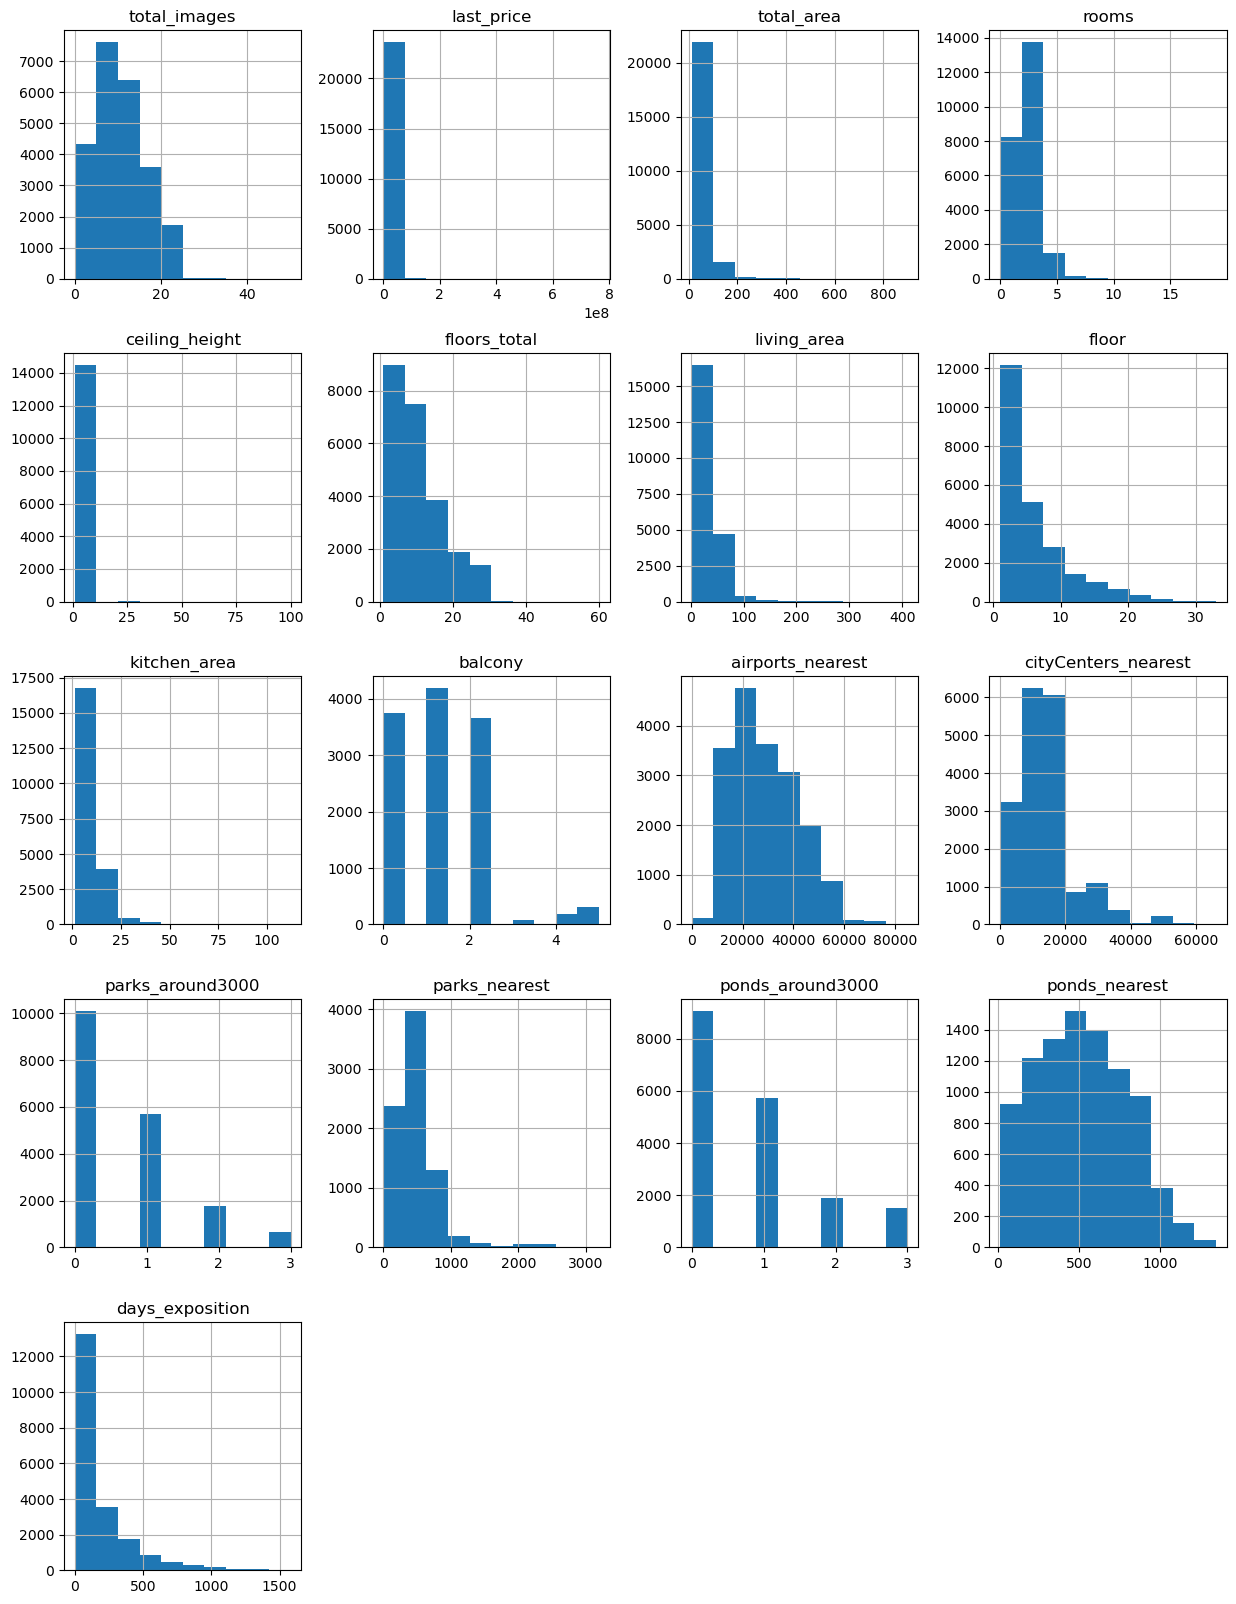

In [5]:
#строим гистограмму для числовых столбцов датафрейма
data.hist(figsize=(15, 20));

Из полученной общей информации можно выделить следующие **особенности датафрейма**, которые необходимо учитывать при последующей работе с данными:
- наличие пропусков данных в 14 столбцах
- наличие данных вещественного типа, которые можно изменить на целочисленный, а также данные типа object, которые можно заменить на булев тип или тип данных для даты и времени
- возможное наличие дублей в locality_name
- необычное распределение на гистограмме в last_price, ceiling_height, rooms и столбцов с площадью: стоит перепроверить данные на наличие выбросов

## Предобработка данных

In [6]:
#выводим количество пропусков в датафрейме
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Причины пропусков**:
- Среди данных, которые заполнены пользователями, пропуски могут быть из-за непредоставления данных клиентами, так как у них не было необходимой информации по квартире, были затруднения при ответе на вопрос, ячейки с ответами были необязательными для заполнения.
- Среди данных, которые заполнены автоматически, пропуски могли возникнуть из-за неполных картографических данных системы: адреса, не отраженные на картах, но существующие в реальности. В случае с обозначением расстояния до ближайшего парка, аэропорта или водоема, пропуски могут быть, поскольку поблизости не нашлось этих объектов. 
- Проблемы в обоих типах данных могли возникнуть также на этапе загрузки или выгрузки данных. Данные могли быть потеряны при объединении таблиц с данными от пользователей и автоматически заполненными данными. 

In [7]:
#проверяем данные из столбца is_apartment, который должен быть булевого типа
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Из всех столбцов мы можем заполнить пропуски у:
- balcony - заменить на 0 отсутствие информации, так как респонденты, вероятно, ничего не указывали при отсутствии у них балконов
- is_apartment - в связи с большим числом пропусков, вероятнее всего, данный вопрос не был заполнен респондентами, возможно, из-за неточного представления о том, что считается апартаментами. В таком случае, если данный столбик понадобится в дальнейшем в исследовании, его можно заполнить данными False, так как если респонденты не знали, что такое апартаменты, у них, скорее всего, не апартаменты. Также можно предложить добавить в анкету дополнительное уточнение в данном вопросе. 
- заменим пропуски в locality_name на "unknown"

- Также проверим гипотезу о том, что пропуски в столбце площадь кухни есть, так как данная графа не была заполнена респондентами, у которых квартиры-студии. В случае подтверждения гипотезы заполним данные строки нулями.
- В квартирах с открытой планировкой также могут быть еще не выделены отдельные площади под кухню или жилую площадь, поэтому в ячейках с пропусками в столбцах площадь кухни и жилая площадь мы можем поставить нули у квартир с данным видом планировки.

Для заполенния остальных столбцов у нас недостаточно информации и заполнение средней, медианой или 0 может исказить результат исследования. 

In [8]:
#проверка гипотезы о площади кухни и заполнение пропусков
data.loc[data['studio'] == 1, 'kitchen_area'] = data.loc[data['studio'] == 1, 'kitchen_area'].fillna(0)

In [9]:
#заполнение пропусков в квартирах с открытой планировкой, где не обозначена площадь кухни или жилая площадь
data.loc[data['open_plan'] == 1, ['kitchen_area', 'living_area']] = data.loc[data['open_plan'] == 1, ['kitchen_area', 'living_area']].fillna(0)

In [10]:
#заполнение пропусков в столбце с количеством балконов
data['balcony'] = data['balcony'].fillna(0)

In [11]:
data['locality_name'] = data['locality_name'].fillna('unknown')

In [12]:
#проверим, что количество пропусков сократилось
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1898
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2062
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
#определяем столбцы, в которых нужно изменить тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21801 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21637 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**Причины, по которым изменили тип данных**:
1) Изменяем вещественный тип данных на целочисленный для оптимизации хранения информации и более легкого восприятия чисел, в которых не непредполагаются дробные значения:
- last_price
- floors_total
- balcony
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition

2) Изменяем категорийный тип данных object на формат даты и времени, чтобы в дальнейшем можно было работать с отдельными временными показателями(отдельно выделить год, день недели, месяц):
- first_day_exposition

In [14]:
#изменяем тип данных на формат дата-время
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [15]:
#изменяем тип данных на целочисленный
#в данных без пропусков
data['last_price'] = data['last_price'].astype('int')

#в данных с пропусками
columns = ['floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for column in columns:
    data[column] = data[column].astype('Int64')

import numpy as np

data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='ignore')).astype('Int64')

#посмотрим на изменения в данных
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16         51.0      8          NaN  ...   
1             NaN            11         18.6      1          NaN  ...   
2             NaN             5         34.3      4          NaN  ...   
3             NaN            14          NaN      9          NaN  ...   
4            3.03            14         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0        0  Санкт-Петербург             18863   
1       

C:\Users\79104\AppData\Local\Temp\ipykernel_5432\2310828617.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='ignore')).astype('Int64')


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21801 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21637 non-null  float64       
 13  balcony         

In [17]:
#выведем уникальные значения столбца с названиями населенных пунктов
data['locality_name'].sort_values().unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

In [18]:
#замена неявных дубликатов в названии населенных пунктов
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace('поселок городского типа', 'городской поселок', regex=True)
    .replace('поселок при железнодорожной станции', 'поселок станции', regex=True)
)

Поскольку среди населенных пунктов есть разные виды поселков, названия которых не отличаются, то для большей точности исследования было решеноне заменять их общим наименованием "поселок", примеры обозначенных поселков в Ленинградской области:

[поселок Лесное](https://yandex.ru/maps/geo/posyolok_lesnoye/53152152/?ll=30.214316%2C60.378150&z=13.43)

[коттеджный поселок Лесное](https://yandex.ru/maps/org/lesnoye/106610336977/?ll=29.863041%2C59.707496&z=15.68)


[поселок Рябово](https://yandex.ru/maps/geo/posyolok_ryabovo/53152244/?ll=28.979488%2C60.336201&z=14.24)

[городской поселок Рябово](https://yandex.ru/maps/geo/gorodskoy_posyolok_ryabovo/53152336/?ll=31.147513%2C59.411475&z=14.08)

In [19]:
#проверим наличие явных дубликатов
data.duplicated().sum()

0

In [20]:
#изменим название столбца с расстоянием до центра для приведения к общепринятому стилю
name_change = {'cityCenters_nearest': 'city_centers_nearest'}
data = data.rename(columns=name_change)

Обработаем аномальные значения по высоте потолков:

In [21]:
#изучим данные по высоте потолков
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Отметим, что в ряде данных есть аномальные значения - слишком маленькие: потолки ниже 2 метров, либо слишком большие. Ошибки могли возникнуть из-за человеческого фактора или техничского сбоя. Можно обработать данные больше 11 метров, разделив их на 10, так как, вероятнее всего, данные по ошибке были записаны в 10 раз больше, чем реальные значения. Потолки до 11 метров не будем удалять, поскольку это может быть реальным значением для элитного жилья, например, потолки от 7 метров могут соотвествовать [двухуровневому или треуровневому пентхаусу](https://elitnoe.ru/articles/991-top-5-elitnyh-kvartir-s-vysotoy-potolkov-ot-5-do-10-metrov)

In [22]:
#изменим чрезвычайно большие значения
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10

In [23]:
#удаляем редкие и аномальные значения, проверим итоговые значения
data = data.drop(data.loc[(data['ceiling_height'] > 11) | (data['ceiling_height'] <= 2)].index)
data['ceiling_height'].sort_values().unique()

array([ 2.2 ,  2.25,  2.26,  2.3 ,  2.34,  2.4 ,  2.45,  2.46,  2.47,
        2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,  2.56,
        2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,
        2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,
        2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,
        2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,
        2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,
        3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,
        3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,
        3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,  3.28,  3.29,
        3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,  3.38,
        3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,  3.48,
        3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,  3.57,
        3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,  3.68,
        3.69,  3.7 ,

In [24]:
len(data)

23683

**Вывод:**
- Проспуски в данных сложно заполнить, так как самые простые методы заполнения могут исказить результат исследования. Полностью были заполнены пропуски только в одном столбце - количестве балконов, так как, вероятнее всего, пропуски были оставлены респондентами, у которых не было балконов. Частично были заполнены пропуски в столбце с площадью кухни нулями у квартир-студий. Пропуски в названии населенных пунктов были заменены на строковое значение. В дальнейшем можно предложить дополнить вопрос анкеты дополнительной инструкцией о заполнении строки нулем при отсутствии балкона, кухни.
- Были изменены типы данных с вещественных чисел на целые для оптимизации хранения и восприятия данных, а также категориальные данные с датой в формат дата-время для дальнейшей работы с компонентами данного столбца.
- Были удалены неявные дубликаты в столбце с названиями населенных пунтков, возникших в связи с разным написанием одних и тех же мест. 
- Было проверено отсутствие явных дубликатов и переименован один столбец.

### Добавление новых столбцов

In [25]:
#вычислим цену одного квадратного метра для каждой квартиры

data['m2_price'] = (data['last_price'] / data['total_area']).astype(float).round(2)

In [26]:
#выведем в отдельном столбце день недели публикации объявления
data['publication_weekday'] = data['first_day_exposition'].dt.weekday

In [27]:
#месяц публикации объявления
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [28]:
#год публикации объявления
data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [29]:
#создадим функцию для категоризации квартир по типам этажа
def floor_category(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [30]:
data['floor_category'] = data.apply(floor_category, axis=1)

In [31]:
#создадим еще столбец для категории этажа, но с числовыми значениями для расчета корреляции в дальнейшем
def floor_type_numeric(row):
    try:
        if row['floor_category'] == 'первый':
            return 0
        elif row['floor_category'] == 'последний':
            return 2
        else:
            return 1
    except:
        pass

data['floor_type'] = data.apply(floor_type_numeric, axis=1)

In [32]:
#переводим расстояние до центра города в километры
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).astype(float).round()

In [33]:
#проверим наличие новых столбцов
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m2_price,publication_weekday,publication_month,publication_year,floor_category,floor_type,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2,755,<NA>,120370.37,3,3,2019,другой,1,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,0,<NA>,81,82920.79,1,12,2018,первый,0,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,2,574,558,92785.71,3,8,2015,другой,1,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,3,234,424,408176.10,4,7,2015,другой,1,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1,48,121,100000.00,1,6,2018,другой,1,8.0


Таким образом, для дальнейшего исследования были добавлены новые столбцы: 
- для определения существует ли зависимость цены квартиры от типа этажа, на котором она расположена, а также день недели, месяц и год выставления на продажу;
- для определения средней цены квадратного метра в самых населенных пунтках, где чаще всего продают квартиры, был выделен столбик цены квадратного метра квартиры;
- для выяснения зависимости цены квартир в Санкт-Петербурге от удаления от центра города был создан столбец со значениями расстояния до центра в километрах.

## Исследовательский анализ данных

Для изучения следующих параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка;

расчитаем минимум и максимум размаха "ящика с усами" для выделения выбросов и их удаления. 

In [34]:
#создадим функцию для расчета минимума и максимума размаха "усов" и импортируем библиотеку для визуализации данных
def whiskers(x, y):
    iqr = y - x
    whisker = 1.5 * iqr
    right_w = y + whisker
    left_w = x - whisker
    return print(left_w, right_w)

import matplotlib.pyplot as plt

### Общая площадь

<Axes: >

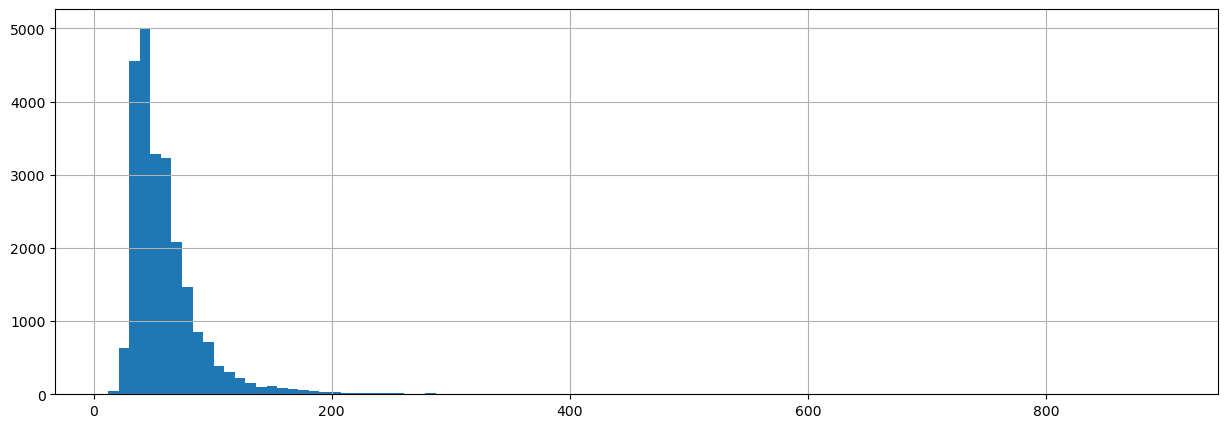

In [35]:
#посмотрим как распределены квартиры в зависимости от общей площади
data.total_area.hist(bins=100, figsize=(15, 5))

Заметим, что основная масса квартир до 200 квадратных метров, при этом есть редкие значения от 800 до 1000 квадратных метров. Минимальная квадратура больше 10 квадратных метров. Поверхностное изучение общей площади квартир на рынке невижимости показало, что существуют квартиры-студии, площадь которых меньше 20 квадратных метров, несмотря на установленную минимальную норму в 24 квадратных метра на одного человека, поэтому, вероятнее всего, площадь квартир наиболее близких к 0 на гистограмме не является аномалией. Квартиры площадью более 250 квадратных метров являются в основном пентхаусами с большим количеством комнат и классифицируется как элитное жилье. Рассмотрим подробнее значения в цифрах.

In [36]:
#изучим показатели по столбцу общая площадь
data.total_area.describe()

count    23683.000000
mean        60.355709
std         35.662047
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [37]:
#определим минимальное и максимальное значение, не считающееся выбросом
whiskers(40, 69)

-3.5 112.5


Квартиры площадью более 110 квадратных метров согласно расчетам являются выбивающимися значениями для всех данных, однако, есть вероятность, что данные квартиры относятся к элитному виду жилья. Проверим данную гипотезу. 

<u>**Попробуем разделить квартиры на два вида: обычные квартиры и элитные квартиры**</u>

Элитное жилье бывает различных классов: бизнес, элит, премиум. В данном исследовании они все будут объединены под одной категорией.

По итогу быстрого анализа источников ([1](https://spbguru.ru/advice/1971-osnovnye-kriterii-zhilja-biznes-i-elit-klassa), [2](https://realty.yandex.ru/journal/post/chto-takoe-elitnoe-zhilyo/), [3](https://nikoliersdom.ru/blog/priznaki-i-kriterii-elitnoj-nedvizhimosti)) мы выделили следующие критерии на основе данных, которые у нас есть:
- **Расположение** - исторический или престижный район, обычно вблизи от центра. То есть данные квартиры должны быть расположены в Санкт-Петербурге вблизи от центра, также рассмотрим квартире в Петергофе, где может быть бизнес-жилье. 
- **Общая площадь** - миимальная площадь квартиры 60 кв. м., для бизнес-класса от 45 кв. м.
    - для 2-хкомнатной квартиры: от 80 кв. м., бизнес - от 65 кв. м.
    - 3-х: от 120 кв. м., бизнес - от 85 кв. м.
    - 4-х: от 250 кв. м., бизнес - от 120 кв. м.
    - от 5 комнат: от 350 кв. м., бизнес - от 150 кв. м.
- **Площадь кухни** - от 20-25 кв.м., для бизнеса - от 12 кв. м.
- Наличие нескольких санузлов
- **Высота потолков** - больше 3 метров, для бизнеса - от 2,75 м
- **Стоимость 1 кв. м.** - в среднем 850 тыс. на первичном рынке, для вторничного от 600 тыс. (на 2024 год), сделаем минимальной отметкой 400 тысяч за квадратный метр с учетом того, что данные по квартирам были собраны несколько лет назад. Для жилья бизнес-класса будем считать от 250 тысяч.

In [38]:
#выведем, какие квартиры соответсвуют критерию стоимости 1 кв. м.
b_class = data.loc[(data['m2_price'] >= 250000) & (data['m2_price'] < 400000)]
b_class

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m2_price,publication_weekday,publication_month,publication_year,floor_category,floor_type,city_centers_nearest_km
51,7,45000000,161.0,2017-10-17,3,3.20,8,38.0,4,NaN,...,3,99,541,279503.11,1,10,2017,другой,1,7.0
155,8,96000000,317.0,2017-07-07,4,3.50,3,183.0,3,NaN,...,3,366,62,302839.12,4,7,2017,последний,2,2.0
263,12,39900000,140.6,2016-11-19,2,3.50,8,39.8,7,NaN,...,3,99,<NA>,283783.78,5,11,2016,другой,1,7.0
282,17,37000000,115.0,2018-11-15,2,NaN,5,65.0,2,NaN,...,2,663,158,321739.13,3,11,2018,другой,1,2.0
411,1,40662000,151.0,2014-12-09,3,NaN,8,85.0,3,NaN,...,3,100,594,269284.77,1,12,2014,другой,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22804,4,81960000,205.0,2017-09-29,4,3.20,9,108.0,3,NaN,...,1,227,169,399804.88,4,9,2017,другой,1,2.0
22898,1,21821800,76.3,2019-04-01,1,3.00,11,37.9,9,False,...,3,215,<NA>,286000.00,0,4,2019,другой,1,7.0
22907,9,65000000,228.0,2016-06-02,4,NaN,5,200.0,2,NaN,...,3,269,<NA>,285087.72,3,6,2016,другой,1,1.0
22948,10,34500000,100.0,2018-06-26,3,NaN,7,34.2,3,NaN,...,0,<NA>,<NA>,345000.00,1,6,2018,другой,1,6.0


In [39]:
e_class = data.loc[data['m2_price'] >= 400000]
e_class

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m2_price,publication_weekday,publication_month,publication_year,floor_category,floor_type,city_centers_nearest_km
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,3,234,424,408176.10,4,7,2015,другой,1,7.0
492,18,95000000,216.0,2017-12-05,4,3.00,5,86.0,4,NaN,...,3,620,14,439814.81,1,12,2017,другой,1,0.0
509,5,90000000,225.0,2016-06-26,6,NaN,4,134.0,2,NaN,...,2,519,416,400000.00,6,6,2016,другой,1,6.0
793,20,135000000,310.0,2018-05-22,4,3.30,5,250.0,2,NaN,...,3,190,342,435483.87,1,5,2018,другой,1,7.0
1026,20,155000000,310.0,2018-10-12,5,5.30,3,190.0,3,NaN,...,1,603,<NA>,500000.00,4,10,2018,последний,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22229,16,148000000,256.0,2016-03-16,5,NaN,6,179.0,5,NaN,...,3,462,233,578125.00,2,3,2016,другой,1,4.0
22709,20,59000000,127.5,2016-12-21,4,3.00,12,85.0,8,NaN,...,3,234,635,462745.10,2,12,2016,другой,1,7.0
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,NaN,...,3,188,<NA>,1542604.80,1,3,2019,последний,2,1.0
22869,0,15000000,25.0,2018-07-25,1,10.00,5,14.0,5,True,...,3,30,19,600000.00,2,7,2018,последний,2,8.0


Значений, выделенных по одному критерию - цены квадратного метра, оказалось незначительное количество в сравнении со всей выборкой. Проверим, найдутся ли среди данных 201 строк, такие, которые бы соответствовали всем критериям элитных квартир.

In [40]:
#выведем, какие квартиры соответсвуют критериям высоты потолка и площади кухни
b_class = b_class.query('kitchen_area > 12 and ceiling_height > 2.75')
b_class

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m2_price,publication_weekday,publication_month,publication_year,floor_category,floor_type,city_centers_nearest_km
51,7,45000000,161.0,2017-10-17,3,3.20,8,38.0,4,NaN,...,3,99,541,279503.11,1,10,2017,другой,1,7.0
263,12,39900000,140.6,2016-11-19,2,3.50,8,39.8,7,NaN,...,3,99,<NA>,283783.78,5,11,2016,другой,1,7.0
643,6,33300000,109.3,2018-02-16,2,3.10,6,NaN,5,NaN,...,3,103,33,304666.06,4,2,2018,другой,1,6.0
674,11,50000000,131.1,2019-02-11,4,3.00,12,80.8,6,NaN,...,3,121,<NA>,381388.25,0,2,2019,другой,1,7.0
824,20,46950000,165.0,2018-11-06,5,3.00,3,87.0,3,NaN,...,2,519,35,284545.45,1,11,2018,последний,2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21955,19,130000000,431.0,2017-10-02,7,3.70,8,220.0,5,NaN,...,<NA>,<NA>,161,301624.13,0,10,2017,другой,1,NaN
22001,13,27900000,97.8,2019-04-02,2,3.00,23,47.0,10,NaN,...,2,444,<NA>,285276.07,1,4,2019,другой,1,5.0
22008,16,28000000,100.1,2016-02-12,3,3.04,8,57.5,4,NaN,...,1,682,893,279720.28,4,2,2016,другой,1,7.0
22500,7,26310000,86.7,2018-03-06,2,3.00,6,NaN,5,NaN,...,3,103,15,303460.21,1,3,2018,другой,1,6.0


In [41]:
e_class = e_class.query('kitchen_area > 20 and ceiling_height > 3')
e_class

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m2_price,publication_weekday,publication_month,publication_year,floor_category,floor_type,city_centers_nearest_km
793,20,135000000,310.0,2018-05-22,4,3.30,5,250.00,2,NaN,...,3,190,342,435483.87,1,5,2018,другой,1,7.0
1026,20,155000000,310.0,2018-10-12,5,5.30,3,190.00,3,NaN,...,1,603,<NA>,500000.00,4,10,2018,последний,2,5.0
1188,20,118000000,290.6,2018-06-01,6,3.82,6,188.70,3,NaN,...,0,<NA>,316,406056.43,4,6,2018,другой,1,6.0
1300,14,120000000,280.0,2018-07-12,5,4.70,4,162.00,3,NaN,...,3,339,225,428571.43,3,7,2018,другой,1,4.0
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.00,5,NaN,...,3,285,233,1736842.11,2,4,2018,другой,1,1.0
5297,19,45000000,96.0,2018-11-15,2,3.20,6,NaN,4,True,...,3,569,<NA>,468750.00,3,11,2018,другой,1,0.0
6813,16,79000000,163.0,2019-02-26,6,3.20,5,90.00,5,NaN,...,1,134,46,484662.58,1,2,2019,последний,2,2.0
8455,18,39744000,72.0,2018-09-19,2,3.05,11,NaN,7,NaN,...,2,99,90,552000.00,2,9,2018,другой,1,5.0
10001,9,49500000,119.0,2016-01-19,3,3.30,8,47.00,2,False,...,0,<NA>,425,415966.39,1,1,2016,другой,1,5.0
11430,20,85000000,145.7,2018-08-16,3,3.36,5,87.23,5,NaN,...,2,500,<NA>,583390.53,3,8,2018,последний,2,7.0


In [42]:
#выведем, какие квартиры соответсвуют критерию общей площади
b_class = b_class.query('rooms >= 2 and total_area > 65')
b_class

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m2_price,publication_weekday,publication_month,publication_year,floor_category,floor_type,city_centers_nearest_km
51,7,45000000,161.0,2017-10-17,3,3.20,8,38.0,4,NaN,...,3,99,541,279503.11,1,10,2017,другой,1,7.0
263,12,39900000,140.6,2016-11-19,2,3.50,8,39.8,7,NaN,...,3,99,<NA>,283783.78,5,11,2016,другой,1,7.0
643,6,33300000,109.3,2018-02-16,2,3.10,6,NaN,5,NaN,...,3,103,33,304666.06,4,2,2018,другой,1,6.0
674,11,50000000,131.1,2019-02-11,4,3.00,12,80.8,6,NaN,...,3,121,<NA>,381388.25,0,2,2019,другой,1,7.0
824,20,46950000,165.0,2018-11-06,5,3.00,3,87.0,3,NaN,...,2,519,35,284545.45,1,11,2018,последний,2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21955,19,130000000,431.0,2017-10-02,7,3.70,8,220.0,5,NaN,...,<NA>,<NA>,161,301624.13,0,10,2017,другой,1,NaN
22001,13,27900000,97.8,2019-04-02,2,3.00,23,47.0,10,NaN,...,2,444,<NA>,285276.07,1,4,2019,другой,1,5.0
22008,16,28000000,100.1,2016-02-12,3,3.04,8,57.5,4,NaN,...,1,682,893,279720.28,4,2,2016,другой,1,7.0
22500,7,26310000,86.7,2018-03-06,2,3.00,6,NaN,5,NaN,...,3,103,15,303460.21,1,3,2018,другой,1,6.0


In [43]:
#найдем оставшиеся неподходящие квартиры
print('Неподходящие по площади 3-комнатные квартиры:', b_class.query('total_area < 85 and rooms == 3')['total_area'].count())
print('Неподходящие по площади 4-комнатные квартиры:', b_class.query('total_area < 120 and rooms == 4')['total_area'].count())
print('Неподходящие по площади 5-комнатные квартиры:', b_class.query('total_area < 150 and rooms >= 5')['total_area'].count())

Неподходящие по площади 3-комнатные квартиры: 1
Неподходящие по площади 4-комнатные квартиры: 0
Неподходящие по площади 5-комнатные квартиры: 0


In [44]:
#удалим лишние данные
b_class = b_class.drop(b_class.loc[(b_class['rooms'] == 3) & (b_class['total_area'] < 85)].index)
b_class

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m2_price,publication_weekday,publication_month,publication_year,floor_category,floor_type,city_centers_nearest_km
51,7,45000000,161.0,2017-10-17,3,3.20,8,38.0,4,NaN,...,3,99,541,279503.11,1,10,2017,другой,1,7.0
263,12,39900000,140.6,2016-11-19,2,3.50,8,39.8,7,NaN,...,3,99,<NA>,283783.78,5,11,2016,другой,1,7.0
643,6,33300000,109.3,2018-02-16,2,3.10,6,NaN,5,NaN,...,3,103,33,304666.06,4,2,2018,другой,1,6.0
674,11,50000000,131.1,2019-02-11,4,3.00,12,80.8,6,NaN,...,3,121,<NA>,381388.25,0,2,2019,другой,1,7.0
824,20,46950000,165.0,2018-11-06,5,3.00,3,87.0,3,NaN,...,2,519,35,284545.45,1,11,2018,последний,2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21955,19,130000000,431.0,2017-10-02,7,3.70,8,220.0,5,NaN,...,<NA>,<NA>,161,301624.13,0,10,2017,другой,1,NaN
22001,13,27900000,97.8,2019-04-02,2,3.00,23,47.0,10,NaN,...,2,444,<NA>,285276.07,1,4,2019,другой,1,5.0
22008,16,28000000,100.1,2016-02-12,3,3.04,8,57.5,4,NaN,...,1,682,893,279720.28,4,2,2016,другой,1,7.0
22500,7,26310000,86.7,2018-03-06,2,3.00,6,NaN,5,NaN,...,3,103,15,303460.21,1,3,2018,другой,1,6.0


In [45]:
print('Неподходящие по площади 2-комнатные квартиры:', e_class.query('total_area < 80 and rooms == 2')['total_area'].count())
print('Неподходящие по площади 3-комнатные квартиры:', e_class.query('total_area < 120 and rooms == 3')['total_area'].count())
print('Неподходящие по площади 4-комнатные квартиры:', e_class.query('total_area < 250 and rooms == 4')['total_area'].count())
print('Неподходящие по площади 5-комнатные квартиры:', e_class.query('total_area < 350 and rooms >= 5')['total_area'].count())

Неподходящие по площади 2-комнатные квартиры: 1
Неподходящие по площади 3-комнатные квартиры: 1
Неподходящие по площади 4-комнатные квартиры: 1
Неподходящие по площади 5-комнатные квартиры: 7


In [46]:
#удалим лишние данные
e_class = e_class.drop(e_class.loc[(e_class['rooms'] == 2) & (e_class['total_area'] < 80)].index)
e_class = e_class.drop(e_class.loc[(e_class['rooms'] == 3) & (e_class['total_area'] < 120)].index)
e_class = e_class.drop(e_class.loc[(e_class['rooms'] == 4) & (e_class['total_area'] < 250)].index)
e_class = e_class.drop(e_class.loc[(e_class['rooms'] >= 5) & (e_class['total_area'] < 350)].index)
e_class

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m2_price,publication_weekday,publication_month,publication_year,floor_category,floor_type,city_centers_nearest_km
793,20,135000000,310.0,2018-05-22,4,3.30,5,250.00,2,NaN,...,3,190,342,435483.87,1,5,2018,другой,1,7.0
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.00,5,NaN,...,3,285,233,1736842.11,2,4,2018,другой,1,1.0
5297,19,45000000,96.0,2018-11-15,2,3.20,6,NaN,4,True,...,3,569,<NA>,468750.00,3,11,2018,другой,1,0.0
11430,20,85000000,145.7,2018-08-16,3,3.36,5,87.23,5,NaN,...,2,500,<NA>,583390.53,3,8,2018,последний,2,7.0
13749,7,240000000,410.0,2017-04-01,6,3.40,7,218.00,7,NaN,...,2,198,199,585365.85,5,4,2017,последний,2,5.0
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.00,5,NaN,...,2,198,111,485436.89,0,12,2017,другой,1,5.0
15883,2,36000000,80.0,2018-11-21,1,3.40,7,33.00,6,NaN,...,3,296,27,450000.00,2,11,2018,другой,1,6.0
16239,5,82400000,181.1,2017-05-24,3,3.90,9,58.20,4,False,...,0,<NA>,501,454997.24,2,5,2017,другой,1,6.0
16647,15,122000000,145.0,2017-04-25,3,3.30,6,36.00,2,NaN,...,3,250,335,841379.31,1,4,2017,другой,1,7.0
17912,17,135000000,166.0,2019-02-07,3,3.30,7,52.00,1,NaN,...,3,215,<NA>,813253.01,3,2,2019,первый,0,6.0


In [47]:
elite_data = pd.concat([b_class, e_class])
elite_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,m2_price,publication_weekday,publication_month,publication_year,floor_category,floor_type,city_centers_nearest_km
51,7,45000000,161.0,2017-10-17,3,3.20,8,38.0,4,NaN,...,3,99,541,279503.11,1,10,2017,другой,1,7.0
263,12,39900000,140.6,2016-11-19,2,3.50,8,39.8,7,NaN,...,3,99,<NA>,283783.78,5,11,2016,другой,1,7.0
643,6,33300000,109.3,2018-02-16,2,3.10,6,NaN,5,NaN,...,3,103,33,304666.06,4,2,2018,другой,1,6.0
674,11,50000000,131.1,2019-02-11,4,3.00,12,80.8,6,NaN,...,3,121,<NA>,381388.25,0,2,2019,другой,1,7.0
824,20,46950000,165.0,2018-11-06,5,3.00,3,87.0,3,NaN,...,2,519,35,284545.45,1,11,2018,последний,2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16239,5,82400000,181.1,2017-05-24,3,3.90,9,58.2,4,False,...,0,<NA>,501,454997.24,2,5,2017,другой,1,6.0
16647,15,122000000,145.0,2017-04-25,3,3.30,6,36.0,2,NaN,...,3,250,335,841379.31,1,4,2017,другой,1,7.0
17912,17,135000000,166.0,2019-02-07,3,3.30,7,52.0,1,NaN,...,3,215,<NA>,813253.01,3,2,2019,первый,0,6.0
19267,20,74000000,153.6,2019-04-29,3,3.30,8,56.0,6,NaN,...,<NA>,<NA>,<NA>,481770.83,0,4,2019,другой,1,NaN


Из всего набора данных осталось только 91 квартира, которые соответствуют критериям элитного жилья. Сохраним отдельно общие данные без этих строк, в дальнейшем все выбивающиеся значения будут классифицированы как выбросы или аномальные значения, так как гипотеза об элитных квартирах была проверена. 

In [48]:
#сохраним весь набор данных в отдельную переменную, а затем назовем новый датафрейм data для удобства анализа
old_data = data.copy()
data = old_data.drop(elite_data.index)
print(len(old_data))
print(len(data))

23683
23592


<Axes: >

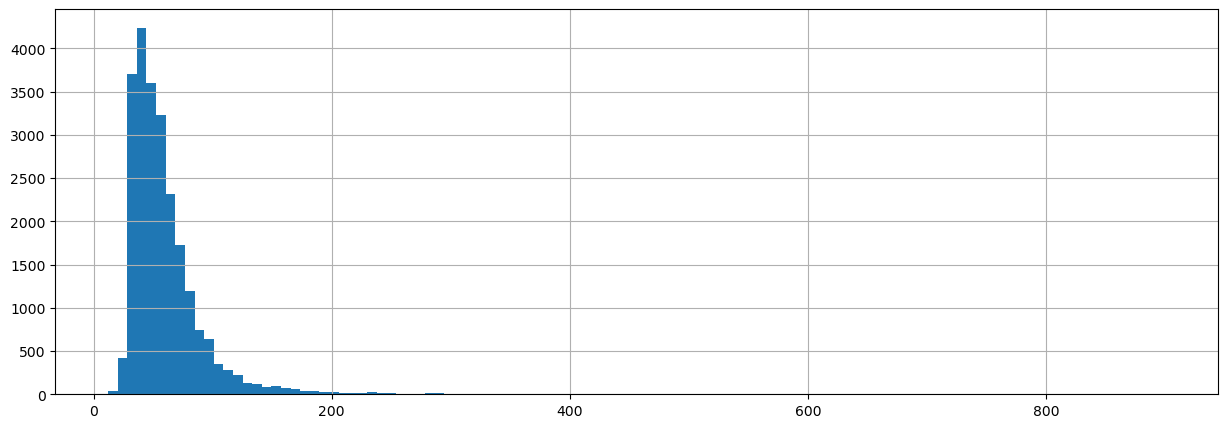

In [49]:
#рассмотрим гистаграмму для обычных квартир 
data.total_area.hist(bins=110, figsize=(15, 5))

In [50]:
data.total_area.describe()

count    23592.000000
mean        59.989117
std         34.883147
min         12.000000
25%         40.000000
50%         52.000000
75%         69.200000
max        900.000000
Name: total_area, dtype: float64

In [51]:
#определим крайние точки
whiskers(40, 70)

-5.0 115.0


In [52]:
#оставим данные с квартирами площадью до 200 квадратных метров, 
#чтобы не исключать из анализа обычные, но просторные квартиры или квартиры класса комфорт
data = data.drop(data.query('total_area > 200').index)
len(data)

23379

In [53]:
#заметим, что наиболее частотные значения площади - целые числа
data.total_area.value_counts().sort_values()

total_area
76.75      1
36.33      1
36.79      1
41.54      1
28.05      1
        ... 
44.00    345
31.00    346
60.00    347
42.00    383
45.00    419
Name: count, Length: 2009, dtype: int64

In [54]:
#округлим данные до целых для более наглядного представления
data.total_area.round().value_counts().sort_values().tail(20)

total_area
41.0    426
39.0    428
54.0    430
33.0    445
37.0    451
58.0    457
50.0    471
35.0    494
34.0    498
38.0    499
43.0    503
40.0    544
60.0    552
32.0    573
36.0    597
31.0    626
46.0    628
44.0    702
42.0    718
45.0    721
Name: count, dtype: int64

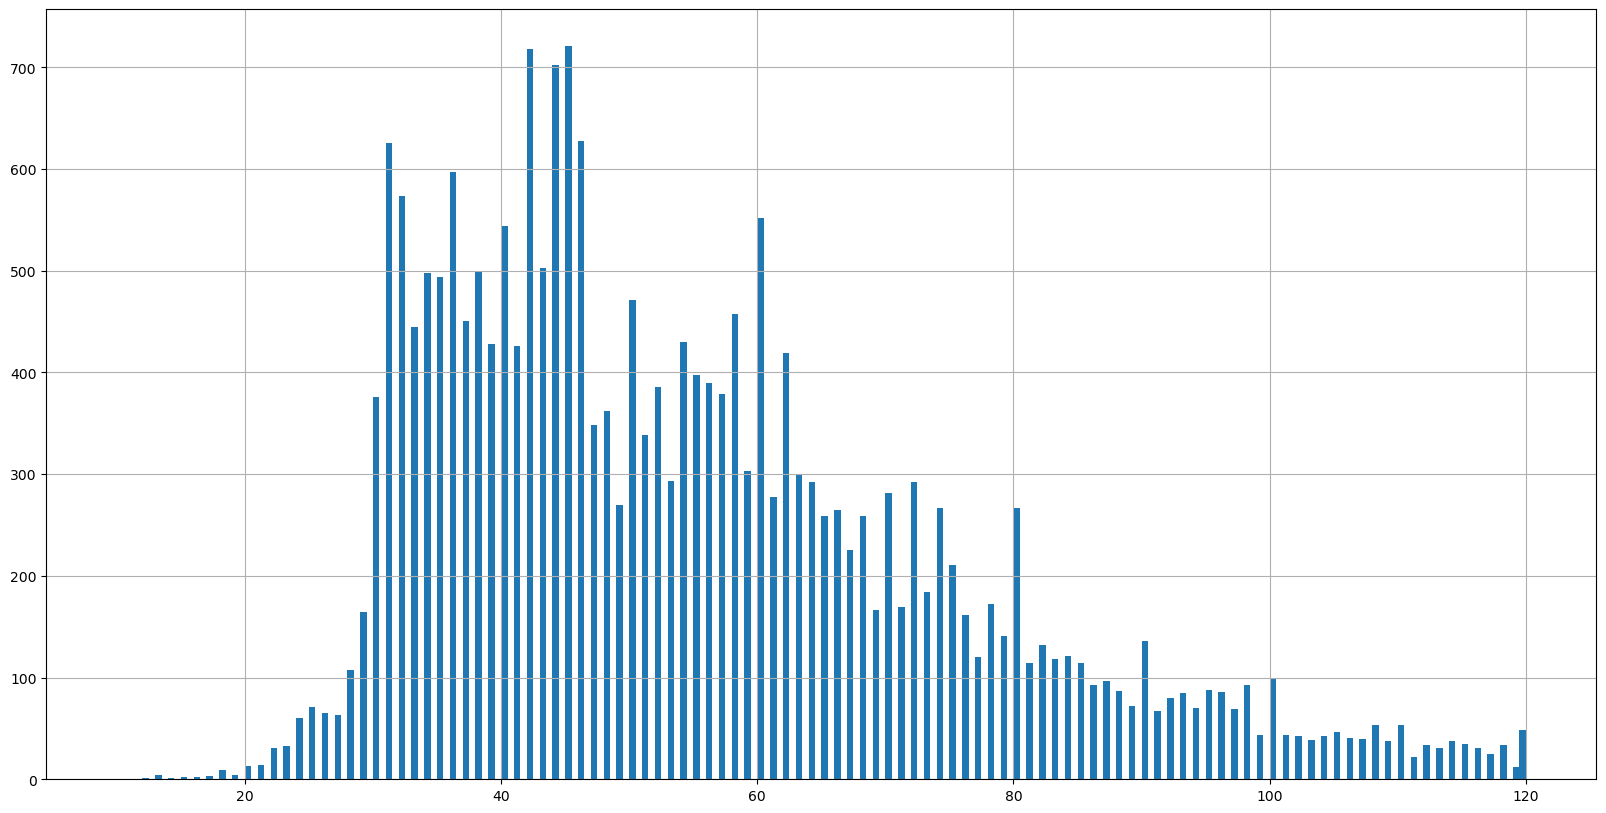

<Axes: >

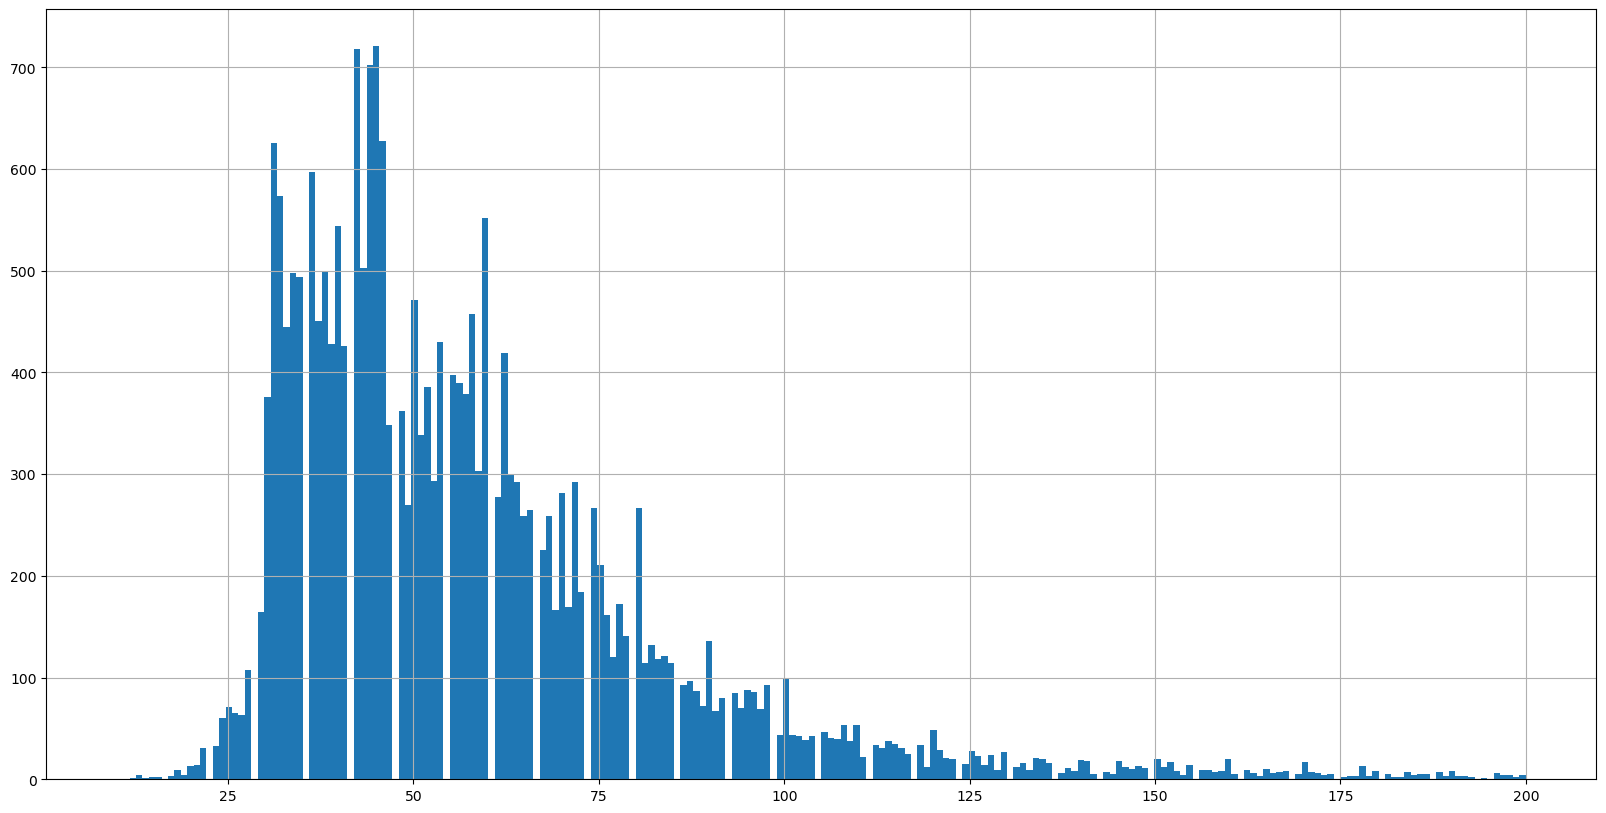

In [55]:
#выведем данные на гистограмме
data.total_area.round().hist(bins=220, figsize=(20, 10), range=(10, 120))
plt.show()
data.total_area.round().hist(bins=220, figsize=(20, 10), range=(10, 200))

Основной объем квартир сосредоточен в диапазоне **от 30 до 65 квадратных метров**.

Пик приходится на квартиры площадью 40-46 квадратных метров. Вторыми по представленности являются квартиры 31-36 кв. м. За ними следуют квартиры квадратурой около 60. 

После значения 75 кв. м. мы видим линейную зависимость уменьшения количества квартир с увеличением общей площади с небольшими всплесками на десятках (80, 90, 100 кв. м.). 

### Жилая площадь и площадь кухни

Проанализируем вместе данные по жилой площади и площади кухни, так как это взаимозависимые данные внутри квартиры, составные части ее общей площади. К жилой площади относят спальные, детские и кабинеты, все остальные конматны являются нежилой площадью, основную часть которой занимает кухня. 

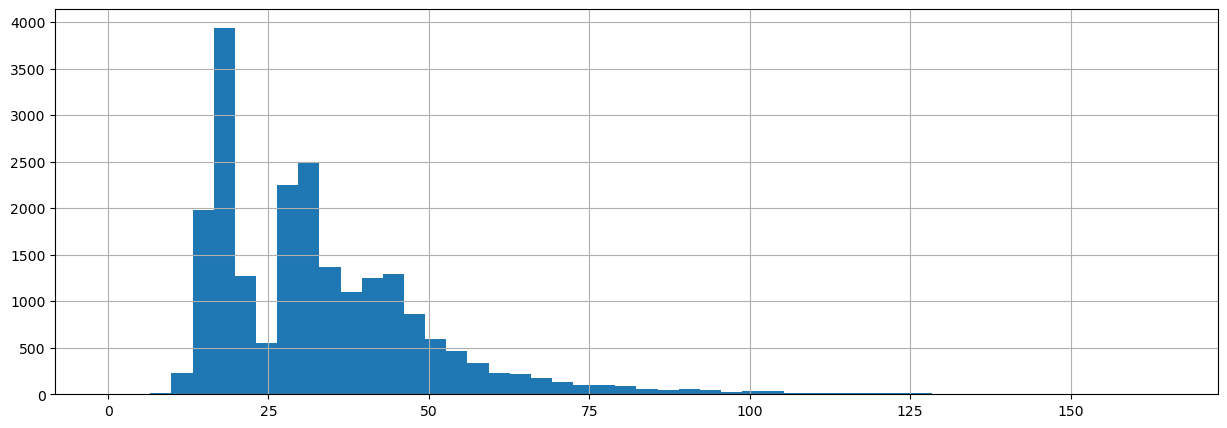

<Axes: >

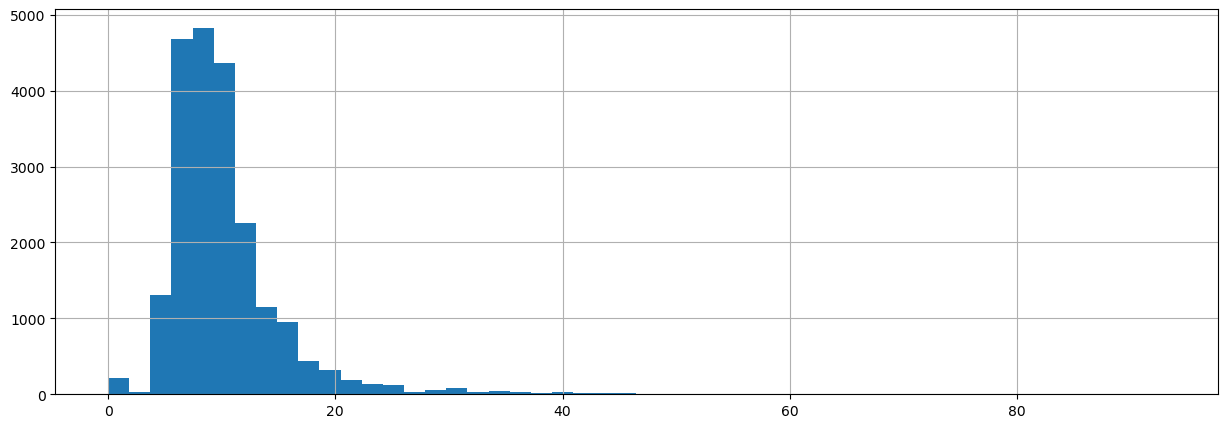

In [56]:
#посмотрим на необработанные данные 
data.living_area.hist(bins=50, figsize=(15,5))
plt.show()
data.kitchen_area.hist(bins=50, figsize=(15,5))

Заметим, что на данных есть нулевые значения, которые мы объясняли или открытой планировкой квартиры или видом квартиры - студией. На гистаграмме видны большие значения жилой площади, достигающие до 150 кв. м., и кухни - около 100 кв. м., а также малые значения, которые могут оказаться или аномалиями, или частью очень небольшой квартиры. Для определения аномалий создадим новые колонки с долей жилой площади и площади кухни относительно общей площади квартиры для оценки адекватности соотношения. 

In [57]:
#создадим столбцы с долей жилой площади и площади кухни от общей площади
data['living_share'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_share'] = round(data['kitchen_area'] / data['total_area'], 2)

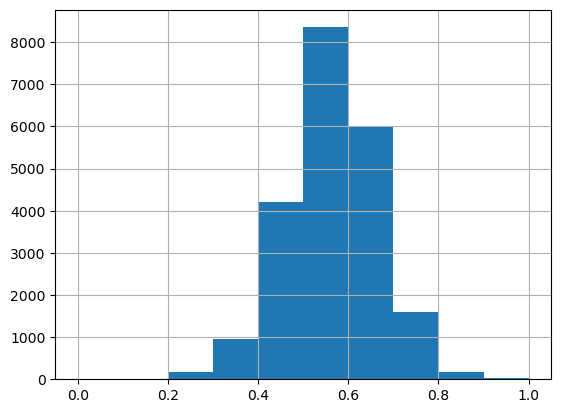

<Axes: >

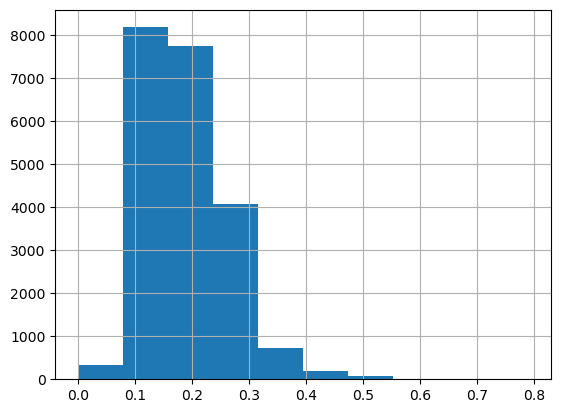

In [58]:
data.living_share.hist()
plt.show()
data.kitchen_share.hist()

Значения на гистаграммах распределены комплементарно, проверим, есть ли пересечения между этими данными: то есть могут ли сумма жилой площади и площади кухни превышать общую площадь квартиры. Определим долю оставшейся нежилой площади, на которую будет приходиться площадь гардеробных, кладовых, коридоров, санузлов. 

In [59]:
#создадим столбец для доли остальных частей квартиры
data['other_share'] = 1 - (data['kitchen_share'] + data['living_share'])
#проверим наличие отрицательных и нулевых значений
data.loc[data['other_share'] <= 0, ['studio', 'open_plan','living_share', 'kitchen_share', 'other_share']]

,studio,open_plan,living_share,kitchen_share,other_share
184,False,False,0.86,0.21,-0.07
220,False,False,0.76,0.24,0.00
545,False,False,0.84,0.21,-0.05
551,False,False,0.97,0.29,-0.26
601,False,False,0.90,0.13,-0.03
...,...,...,...,...,...
22869,False,False,0.56,0.44,0.00
22963,False,False,0.76,0.24,0.00
23202,False,False,0.93,0.19,-0.12
23297,False,False,0.88,0.12,0.00


In [60]:
#удалим аномальные значения
data = data.drop(data.loc[data['other_share'] <= 0].index)
len(data)

23241

Рассмотрим, каким цифрам соответствуют доли оставшейся части квартиры, которая должна включать как минимум санузел и коридор, чтобы определить, аномальные ли это значения. 

In [61]:
#посмотрим на средние показали по доле площади кухни и жилой площади
print(data.living_share.describe())
data.kitchen_share.describe()

count    21375.000000
mean         0.563023
std          0.103583
min          0.000000
25%          0.490000
50%          0.570000
75%          0.640000
max          0.990000
Name: living_share, dtype: float64


count    21209.000000
mean         0.185459
std          0.073722
min          0.000000
25%          0.130000
50%          0.170000
75%          0.230000
max          0.720000
Name: kitchen_share, dtype: float64

В среднем на жилую площадь приходится около 60% квартиры, на кухню - около 20%, значит на остальные помещения (балконы не входят в общую площадь) должно приходиться около 20%. 

In [62]:
data.other_share.describe()

count    20772.000000
mean         0.253007
std          0.067318
min          0.010000
25%          0.210000
50%          0.250000
75%          0.290000
max          1.000000
Name: other_share, dtype: float64

Заметим, что есть аномальные значения в виде квартир, где 100% площади относится к нежилой - нужно проверить, относятся ли данные квартиры к апартаментам или открытой планировке или же являются результатом сбоя или ошибки. Отметим, что есть значения приближающиеся к минимальным. Необходимо проверить, насколько реалистичны данные показатели и как они соотносятся с реальными кв. м. 

In [63]:
#гипотеза об открытой планировке подтвердилась
data.query('other_share == 1')['open_plan']

780      True
5749     True
7818     True
17783    True
Name: open_plan, dtype: bool

<Axes: >

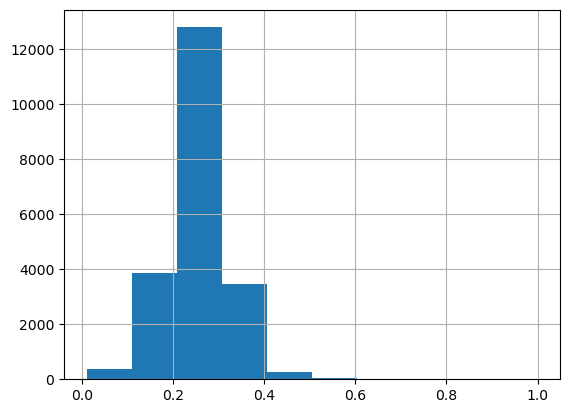

In [64]:
data.other_share.hist()

Далее исследуем очень маленький (меньше 0.1) и очень большой (больше 0.5) процент нежилой площади. 

In [65]:
data['other_area'] = data['total_area'] - (data['kitchen_area'] + data['living_area'])
data.loc[data['other_share'] <= 0.10, ['other_share', 'other_area', 'total_area']]

,other_share,other_area,total_area
41,0.04,3.00,74.0
171,0.02,1.00,49.0
319,0.10,5.90,59.7
354,0.09,3.60,42.6
368,0.08,6.50,85.0
...,...,...,...
23154,0.10,8.00,77.0
23216,0.07,7.80,114.0
23328,0.07,4.00,54.0
23521,0.08,5.70,65.0


Минимальной нормой для санузла при раздельной ванне и туалете является [0,96 кв. м.](https://setroom.ru/vannaya-i-tualet/kakie-byvayut-standartnye-razmery-sanuzlov-i-minimalnye-soglasno-snip.html), округлим до 1. Санузел не может выходить в жилую комнату, обязательно должен быть коридор или прихожая. Итого минимальная нежилая площадь должна быть 3 кв. м. 

In [66]:
data.loc[(data['other_area'] <= 3) & (data['studio'] == 0), ['other_share', 'other_area', 'total_area', 'studio']]

,other_share,other_area,total_area,studio
41,0.04,3.00,74.00,False
171,0.02,1.00,49.00,False
1210,0.04,1.30,29.80,False
1312,0.08,2.00,26.00,False
1656,0.04,1.00,28.00,False
...,...,...,...,...
22384,0.11,2.23,22.23,False
22461,0.06,1.50,25.20,False
22849,0.08,2.00,25.00,False
23097,0.03,0.70,26.00,False


Данные оказались аномальными, указанных квадратных метров недостаточно для размещения всех остальные пространств в квартире, особенно в квартирах с большой квадратурой, в связи с которой предполагается наличие нескольких санузлов, коридора и, возможно, кладовой/гардеробной. 

In [67]:
#удалим аномальные значения
data = data.drop(data.loc[(data['studio'] == 0) & (data['other_area'] <= 3)].index)
len(data)

23104

In [68]:
data.loc[(data['other_share'] <= 0.1) & (data['total_area'] > 50), ['rooms', 'other_share', 'other_area', 'total_area']]

,rooms,other_share,other_area,total_area
319,3,0.10,5.9,59.7
368,3,0.08,6.5,85.0
491,3,0.08,5.3,66.1
511,1,0.09,6.0,69.0
704,4,0.10,14.0,141.0
...,...,...,...,...
23139,2,0.05,4.0,81.0
23154,3,0.10,8.0,77.0
23216,4,0.07,7.8,114.0
23328,2,0.07,4.0,54.0


Данное соотноешние: больших просторных квартир и незначительной нжилой площади мало соответствует реальности, так как в простоных квартирах строят просторные санузлы, в подобном жилье есть просторные коридоры между комнатами, а также кладовки и гардеробные. 

In [69]:
#удалим аномальные данные
data = data.drop(data.loc[(data['other_share'] <= 0.1) & (data['total_area'] > 50)].index)
len(data)

22925

In [70]:
#рассмотрим чрезвычайно большие показатели
data.loc[(data['other_share'] >= 0.5) & (data['open_plan'] == 0), ['rooms', 'other_share', 'other_area', 'living_area', 'kitchen_area', 'total_area']]

,rooms,other_share,other_area,living_area,kitchen_area,total_area
331,2,0.59,73.60,37.10,14.10,124.80
567,1,0.55,58.30,38.60,10.00,106.90
1253,3,0.63,80.06,29.41,17.53,127.00
2129,2,0.56,54.17,30.57,12.00,96.74
2201,3,0.56,76.45,35.88,24.03,136.36
...,...,...,...,...,...,...
22993,2,0.51,30.00,20.50,8.00,58.50
23394,3,0.75,69.00,13.00,10.00,92.00
23549,3,0.57,103.80,55.70,24.50,184.00
23555,7,0.56,88.70,57.40,12.40,158.50


In [71]:
#удалим также значения, где нежилая площадь без кухни занимает больше половины пространства 
#и не является квартирой с открытой планировкой
data = data.drop(data.loc[(data['other_share'] >= 0.50) & (data['open_plan'] == 0)].index)
len(data)

22859

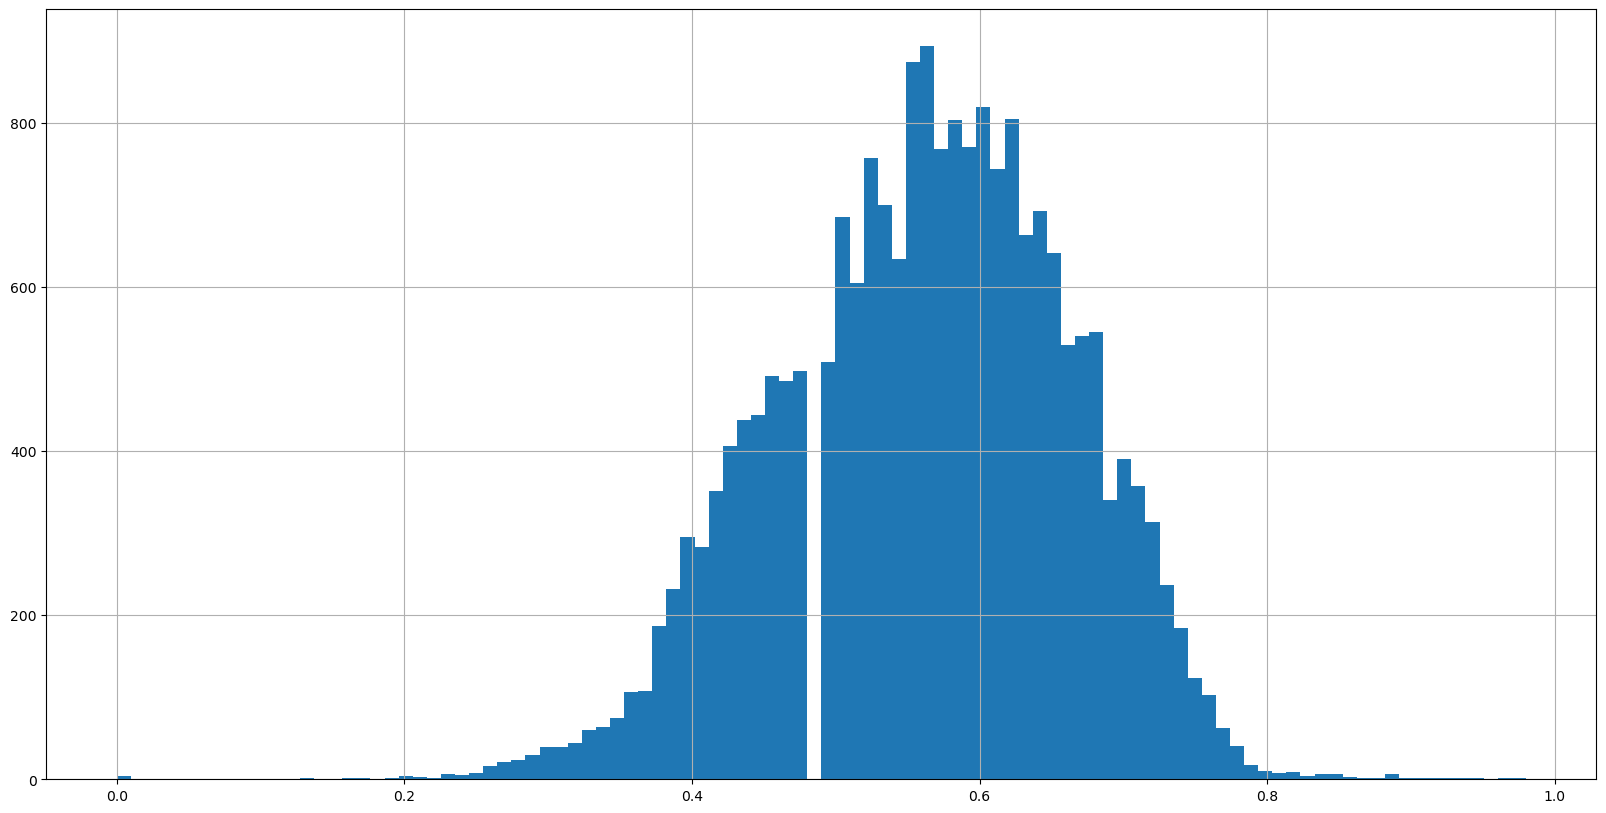

<Axes: >

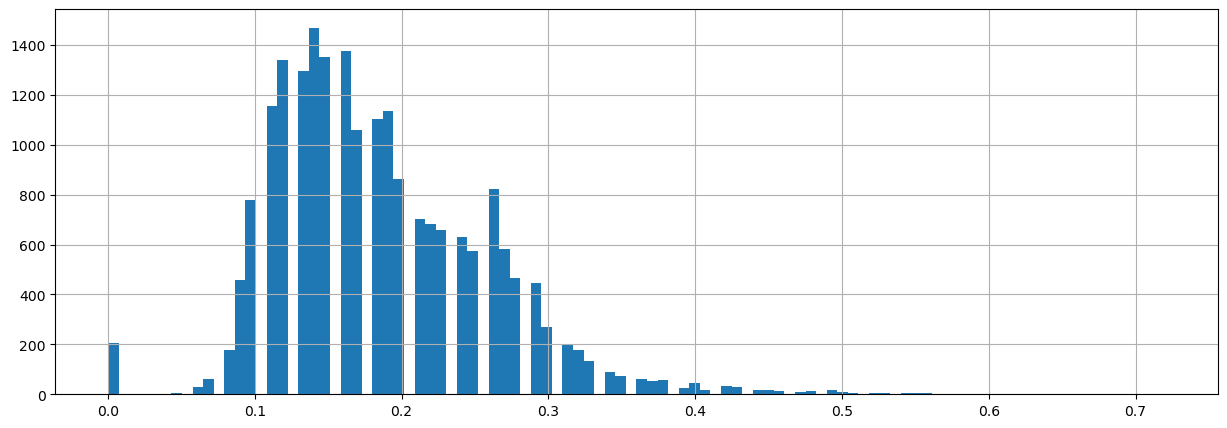

In [72]:
#выведем снова гистаграммы
data.living_share.hist(bins=100, figsize=(20, 10))
plt.show()
data.kitchen_share.hist(bins=100, figsize=(15, 5))

Рассмотрим подробнее данные с необычной долей: квартиры с жилой площадью меньше 30% и больше 80%, то есть, где комнаты являются малой частью пространства или, наоборот, занимают практически всю площадь, не оставляя места для нежилых комнат. Также изучим квартиры, где кухня занимает более 40% места или же менее 7%.
Отметим, что на гистаграмме с жилой площадью заметен необычный провал, который может объясняться либо отсутствием в выделенных данных квартир с жилой площадью такой доли, либо сбоем из-за которого часть с этими данными не отразилась.  

In [73]:
#удаляем данные по квартирам с жилой площадью меньше 30% и площадью больше 60 кв. м.
data.loc[(data['living_share'] <= 0.3) & (data['open_plan'] == 0), ['living_share', 'living_area', 'kitchen_share', 'kitchen_area', 'other_share', 'other_area', 'rooms', 'total_area']]

,living_share,living_area,kitchen_share,kitchen_area,other_share,other_area,rooms,total_area
6,0.28,10.60,0.39,14.40,0.33,12.30,1,37.30
123,0.29,14.00,0.50,23.80,0.21,10.20,1,48.00
176,0.29,15.36,0.40,20.91,0.31,16.29,1,52.56
219,0.29,17.00,0.27,15.70,0.44,26.00,1,58.70
352,0.27,13.00,0.31,15.00,0.42,20.60,1,48.60
...,...,...,...,...,...,...,...,...
23208,0.22,8.00,0.59,22.00,0.19,7.00,1,37.00
23359,0.28,10.00,NaN,NaN,NaN,NaN,1,36.13
23388,0.28,12.00,0.47,20.00,0.25,11.00,1,43.00
23481,0.27,10.08,0.45,16.88,0.28,10.33,1,37.29


В маленьких квартирах соотношение маленькой комнаты и большой кухни может объясняться тем, что кухня совмещена со столовой или гостинной и поэтому занимает большую площадь. Удалим данные, где общая площадь квартиры больше 60 кв. м.

In [74]:
data = data.drop(data.loc[(data['living_share'] <= 0.3) & (data['open_plan'] == 0) & (data['total_area'] > 60)].index)
len(data)

22825

In [75]:
#рассмотрим аномально большие значения жилой площади
data.loc[(data['living_share'] >= 0.8) & ((data['open_plan'] == 0) | (data['studio'] == 0)), ['living_share', 'kitchen_share', 'living_area', 'other_area', 'total_area', 'kitchen_area']]

,living_share,kitchen_share,living_area,other_area,total_area,kitchen_area
424,0.90,NaN,88.00,NaN,98.00,NaN
440,0.91,0.00,24.75,2.36,27.11,0.0
902,0.80,0.08,49.00,7.10,61.20,5.1
2719,0.84,0.00,21.00,4.00,25.00,0.0
2720,0.84,NaN,57.00,NaN,68.00,NaN
...,...,...,...,...,...,...
22095,0.91,NaN,33.20,NaN,36.50,NaN
22246,0.85,0.00,23.30,4.00,27.30,0.0
22829,0.80,0.12,40.00,4.00,50.00,6.0
23102,0.84,NaN,55.50,NaN,66.00,NaN


In [76]:
#удалим аномальные данные из-за нереалистичного соотношения жилой и нежилой площади
data = data.drop(data.loc[(data['living_share'] >= 0.8) & ((data['open_plan'] == 0) | (data['studio'] == 0))].index)
len(data)

22761

In [77]:
#данные, где кухня занимает более 40% площади оставим, так как эти кухни могут быть соединены со столовой или гостиной 
data.loc[data['kitchen_share'] >= 0.5, ['kitchen_share','kitchen_area', 'living_share', 'living_area', 'rooms', 'other_area', 'total_area']]

,kitchen_share,kitchen_area,living_share,living_area,rooms,other_area,total_area
123,0.50,23.80,0.29,14.00,1,10.20,48.00
680,0.53,23.00,0.21,9.00,1,11.00,43.00
1326,0.62,32.00,0.17,9.00,2,11.00,52.00
3290,0.52,21.90,0.28,11.90,1,8.50,42.30
3875,0.50,20.00,0.35,14.00,1,6.00,40.00
4074,0.54,30.50,0.23,13.30,1,12.80,56.60
4310,0.55,22.00,0.30,12.00,1,6.00,40.00
4803,0.54,32.80,0.33,19.70,1,7.90,60.40
5652,0.54,24.00,0.33,15.00,1,5.80,44.80
6479,0.56,21.30,0.34,12.80,2,3.90,38.00


In [78]:
#удалим квартиры, где общая площадь больше 50 кв. м., условие выше им не соответствует
data = data.drop(data.loc[(data['kitchen_share'] >= 0.5) & (data['total_area'] > 50)].index)
len(data)

22749

In [79]:
#рассмотрим квартры с аномально маленькими кухнями
data.loc[(data['kitchen_share'] >= 0.07) & (data['kitchen_share'] > 0), ['kitchen_share','kitchen_area', 'living_share', 'living_area', 'other_area', 'total_area']]
#.sample(30)
#.sort_values(by='kitchen_share')

,kitchen_share,kitchen_area,living_share,living_area,other_area,total_area
0,0.23,25.00,0.47,51.0,32.00,108.00
1,0.27,11.00,0.46,18.6,10.80,40.40
2,0.15,8.30,0.61,34.3,13.40,56.00
4,0.41,41.00,0.32,32.0,27.00,100.00
5,0.30,9.10,0.47,14.4,6.90,30.40
...,...,...,...,...,...,...
23693,0.13,8.00,0.64,40.0,14.40,62.40
23694,0.10,13.83,0.55,73.3,46.68,133.81
23695,0.14,8.50,0.64,38.0,12.50,59.00
23697,0.30,23.30,NaN,NaN,NaN,76.75


In [80]:
#удалим квартры с аномально маленькими кухнями
data = data.drop(data.loc[(data['kitchen_share'] <= 0.07) & (data['kitchen_share'] > 0)].index)
len(data)

22651

In [81]:
#определим крайние точки "усов" жилой площади и площади кухни
print(data.living_area.describe())
data.kitchen_area.describe()

count    20788.000000
mean        32.672747
std         16.571199
min          0.000000
25%         18.500000
50%         30.000000
75%         41.600000
max        150.800000
Name: living_area, dtype: float64


count    20656.000000
mean        10.089723
std          4.830964
min          0.000000
25%          7.000000
50%          9.000000
75%         11.600000
max         65.000000
Name: kitchen_area, dtype: float64

In [82]:
print('Крайние значения жилой площади:')
whiskers(18, 42)
print('Крайние значения площади кухнии:')
whiskers(7, 11)

Крайние значения жилой площади:
-18.0 78.0
Крайние значения площади кухнии:
1.0 17.0


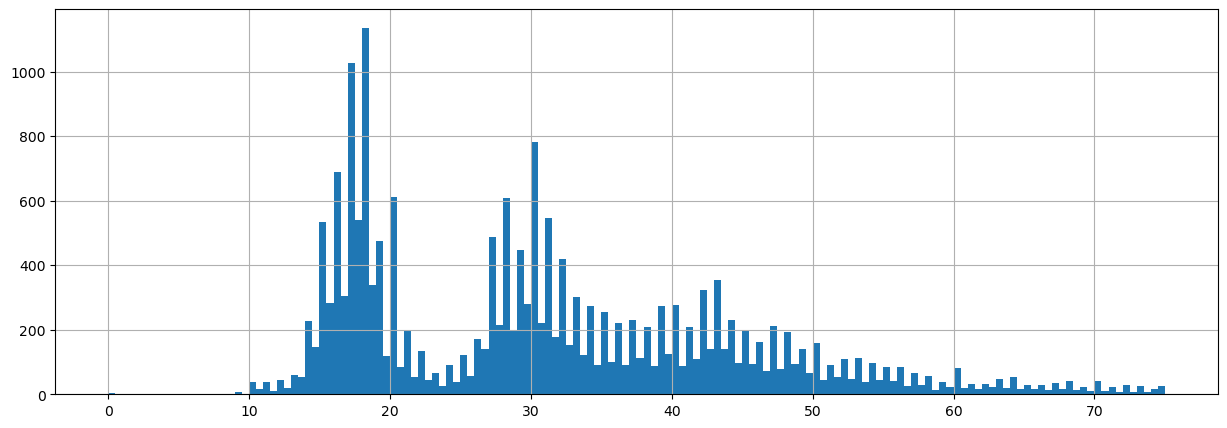

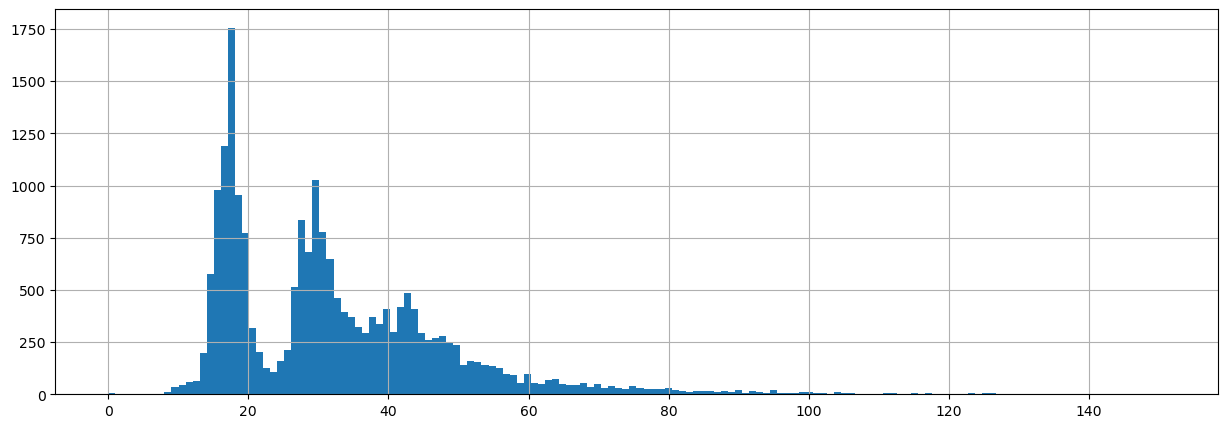

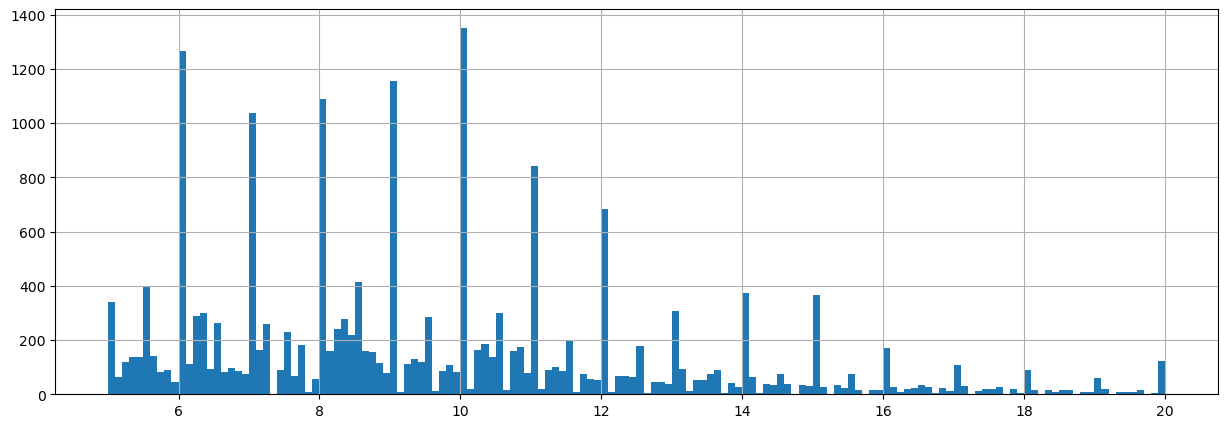

<Axes: >

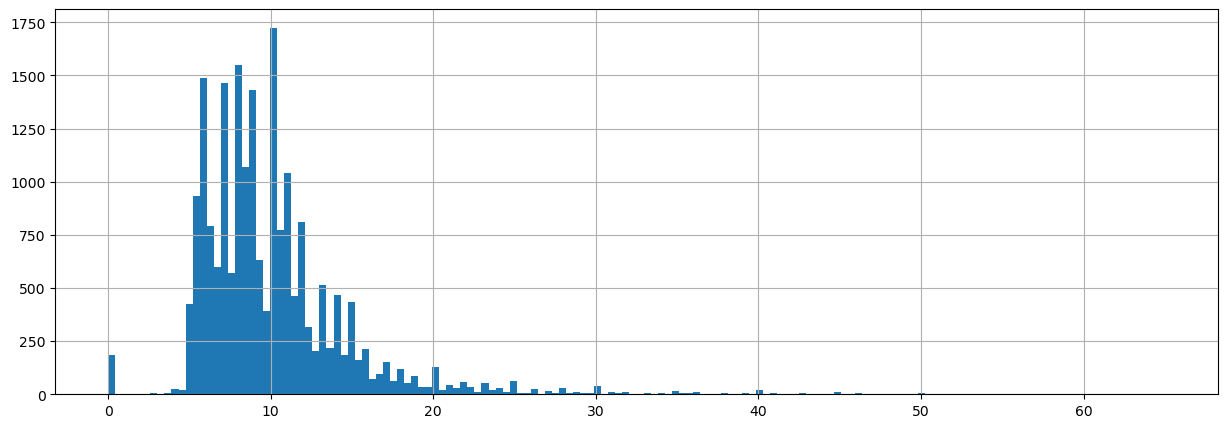

In [83]:
data.living_area.hist(bins=150, figsize=(15,5), range=(0, 75))
plt.show()
data.living_area.hist(bins=150, figsize=(15,5))
plt.show()
data.kitchen_area.hist(bins=150, figsize=(15,5), range=(5, 20))
plt.show()
data.kitchen_area.hist(bins=150, figsize=(15,5))

Первый пик жилой площади приходится на пространство в 15-20 кв. м., второй на показатель около 30 квадратных метров. В среднем это представляет собой примерно половину от общей площади самых продаваемых квартир. Также заметен небольшой подъем в диапазоне 40-45 кв. м., что может объясняться маленьким размером нежилой площади и большими комнатами в некоторых квартирах. 

Отметим пики на целых значениях площади кухни, это может объясняться тем, что под кухни чаще выделяют целочисленное пространство или тем, что респонденты при заполнении данных о квартире указывают площадь, округляя до целых чисел. Наиболее часто встречаются квартиры с площадью кухни от 6 до 10 кв. м. Чуть менее распространены, но частоты квартиры с площадью кухни в 11-15 кв.м.

In [84]:
#удалим выбросы из датафрейма
data = data.query('living_area < 80')
len(data)

20382

In [85]:
data = data.query('kitchen_area < 30')
len(data)

19664

### Цена объекта

<Axes: >

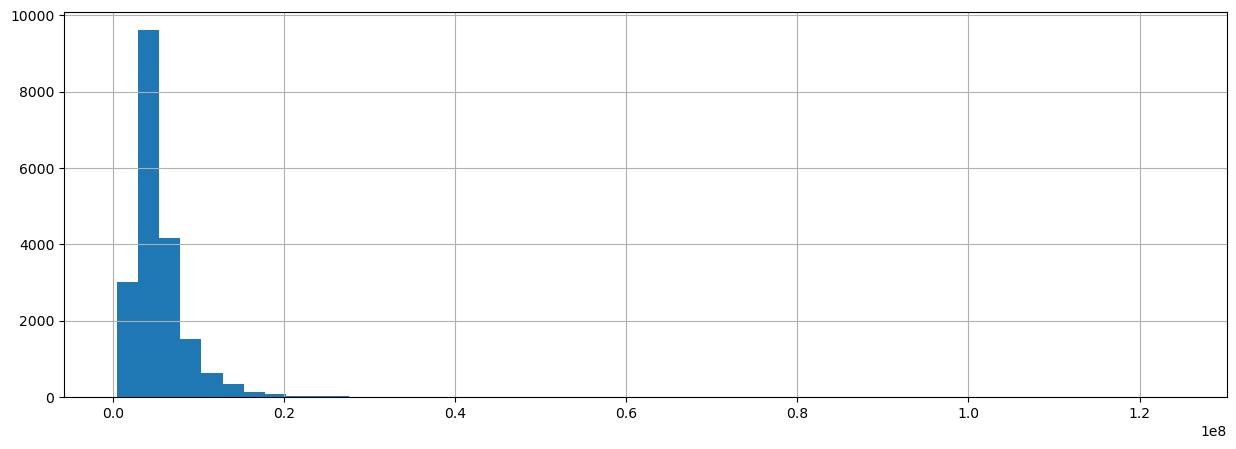

In [86]:
#рассмотрим цены квартир
data.last_price.hist(bins=50, figsize=(15, 5))

In [87]:
data.last_price.describe()

count    1.966400e+04
mean     5.402723e+06
std      3.694310e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.523500e+06
75%      6.300000e+06
max      1.240000e+08
Name: last_price, dtype: float64

Абсолютное большинство квартир стоят до 20 миллионов, однако, гистограмма протянута до значения в 120 миллионов в связи с наличием квартир с аномально высокой ценой. Определим реалистичную цену по крайним точкам и удалим выбросы.

In [88]:
whiskers(3400000, 6300000)

-950000.0 10650000.0


<Axes: >

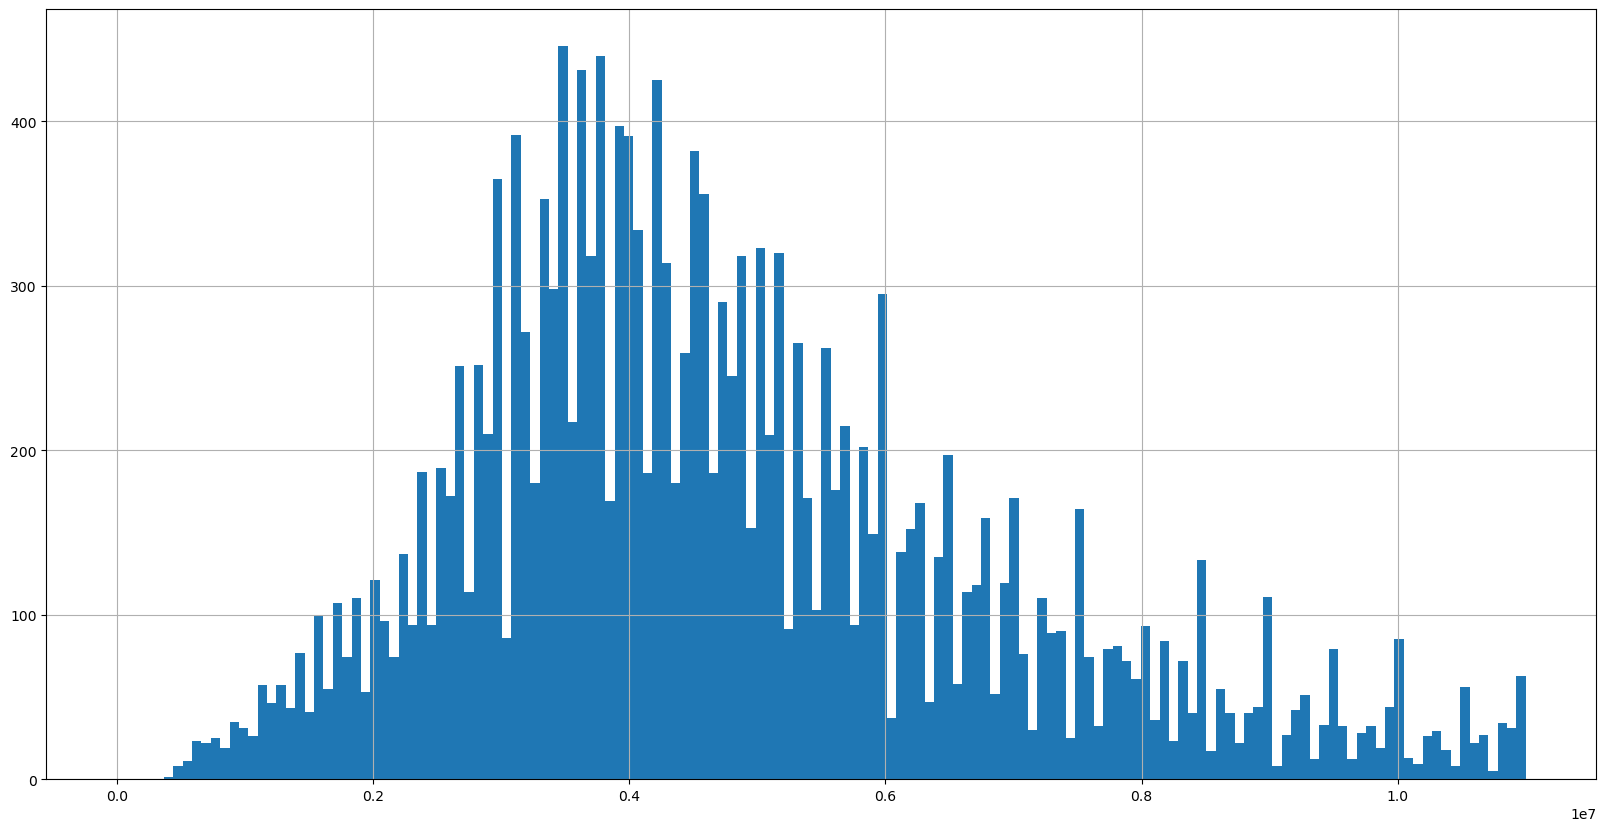

In [89]:
data.last_price.hist(bins=150, figsize=(20, 10), range=(0, 11000000))

Большинство цен квартир расположены в диапазоне от 3 до 6 миллионов с пиком в пределах 3,5-4 миллиона. В целом данные распределены равномерно с немного более длинной правой стороной, соответсвующей более высоким ценам.

Удалим из датафрейма выбросы, оставим квартиры стоимостью меньше 20 миллионов.

In [90]:
#удалим выбросы из датафрейма
data = data.query('last_price < 20000000')
len(data)

19510

### Количество комнат

<Axes: >

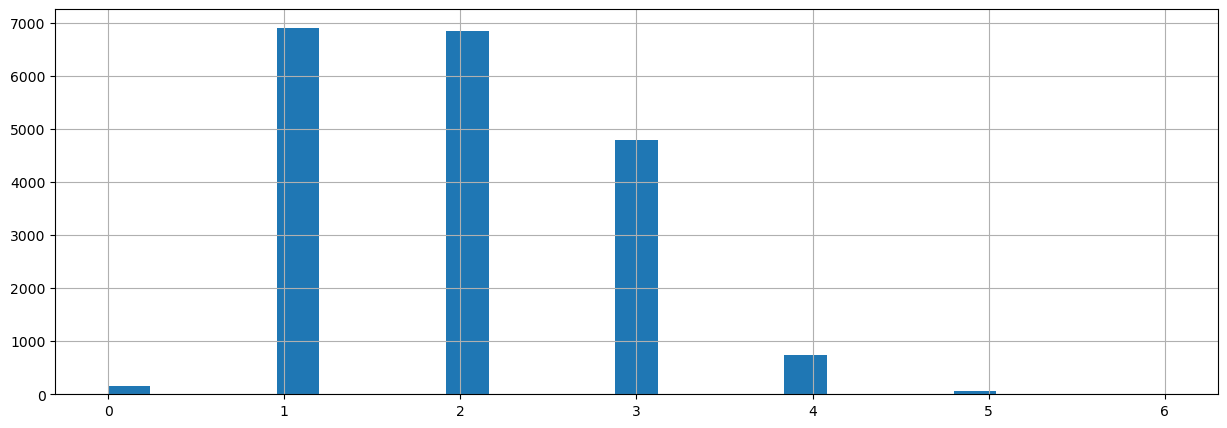

In [91]:
#рассмотрим количество комнат
data.rooms.hist(bins=25, figsize=(15, 5))

Есть нулевые значения, которые могут соответствовать квартирам с открытой планировкой или студиям - ниже проверим данную гипотезу.

Чаще всего продаются однокомнатные и двукомнатные квартиры, также распространены трехкомнатные. 4-ех комнатные квартиры продаются редко. 

In [92]:
data.rooms.value_counts().sort_values()

rooms
6       5
5      68
0     159
4     740
3    4786
2    6845
1    6907
Name: count, dtype: int64

In [93]:
#проверим гипотезу о квартирах с 0 комнат
data.loc[(data['rooms'] == 0) & ((data['open_plan'] == 1) | data['studio'] == 1)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,publication_weekday,publication_month,publication_year,floor_category,floor_type,city_centers_nearest_km,living_share,kitchen_share,other_share,other_area
144,1,2450000,27.0,2017-03-30,0,NaN,24,15.5,2,NaN,...,3,3,2017,другой,1,NaN,0.57,0.0,0.43,11.5
349,4,2320000,25.0,2017-09-27,0,NaN,14,17.0,1,NaN,...,2,9,2017,первый,0,NaN,0.68,0.0,0.32,8.0
508,0,3375000,34.4,2017-03-28,0,NaN,26,24.3,19,NaN,...,1,3,2017,другой,1,19.0,0.71,0.0,0.29,10.1
697,12,2500000,24.1,2017-12-01,0,2.75,25,17.5,21,NaN,...,4,12,2017,другой,1,NaN,0.73,0.0,0.27,6.6
716,5,1500000,17.0,2017-06-07,0,2.70,9,12.0,1,NaN,...,2,6,2017,первый,0,30.0,0.71,0.0,0.29,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22877,2,4280000,28.0,2017-10-26,0,2.70,19,18.0,10,NaN,...,3,10,2017,другой,1,7.0,0.64,0.0,0.36,10.0
23210,7,3200000,26.0,2017-09-01,0,NaN,25,18.0,16,NaN,...,4,9,2017,другой,1,13.0,0.69,0.0,0.31,8.0
23442,0,2500000,27.7,2017-09-28,0,NaN,24,18.0,4,NaN,...,3,9,2017,другой,1,NaN,0.65,0.0,0.35,9.7
23592,10,1450000,29.0,2017-11-11,0,NaN,9,18.0,8,NaN,...,5,11,2017,другой,1,NaN,0.62,0.0,0.38,11.0


In [94]:
#рассмотрим квартиры с 6 комнатами, чтобы проверить, аномальные ли это данные 
data.query('rooms == 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,publication_weekday,publication_month,publication_year,floor_category,floor_type,city_centers_nearest_km,living_share,kitchen_share,other_share,other_area
3324,1,9200000,138.0,2016-03-22,6,NaN,5,77.6,2,NaN,...,1,3,2016,другой,1,5.0,0.56,0.10,0.34,46.3
9856,13,12000000,106.0,2018-07-30,6,2.80,3,70.0,1,NaN,...,0,7,2018,первый,0,5.0,0.66,0.14,0.20,21.0
14264,13,14000000,94.0,2019-01-23,6,2.65,<NA>,51.0,23,NaN,...,2,1,2019,None,1,13.0,0.54,0.17,0.29,26.7
21218,0,9000000,125.7,2018-03-21,6,2.55,15,73.6,15,NaN,...,2,3,2018,последний,2,13.0,0.59,0.09,0.32,41.2
23047,11,10500000,110.0,2018-06-30,6,3.20,7,75.0,6,NaN,...,5,6,2018,другой,1,4.0,0.68,0.10,0.22,24.0


Заметим, что к комнатами являются только помещения жилой площади, таким образом, мы можем проверить средний размер одной комнаты, разделив жилую площадь на количество комнат. Так, квартира, где 51 кв. м. жилой площади с 6 комнатами означает, что каждая комната в квартире около 8 кв. м., что является странным показателем для обычной просторной квартиры в 94 кв. м.
Создадим дополнительный столбец для проверки соотношения жилой площади с количеством комнат и удалим маловероятные данные.

In [95]:
data['rooms_area'] = data['living_area'] / data['rooms']
data['rooms_area'].sort_values()

22473    4.550
6843     5.500
3854     5.575
11223    5.600
542      5.720
         ...  
4971       inf
15434      inf
780        NaN
5749       NaN
7818       NaN
Name: rooms_area, Length: 19510, dtype: float64

Мы видим, что размер некоторых комнат совсем маленький - меньше 10 кв. м., изучим подробнее данные по этим квартирам. В конце списка значения, которые получились из-зи отсутствия данных или деления на 0 комнат. Найдем на гистаграмме максимальное значение площади комнаты, а также посмотрим на распределение средней площади комнат. 

<Axes: >

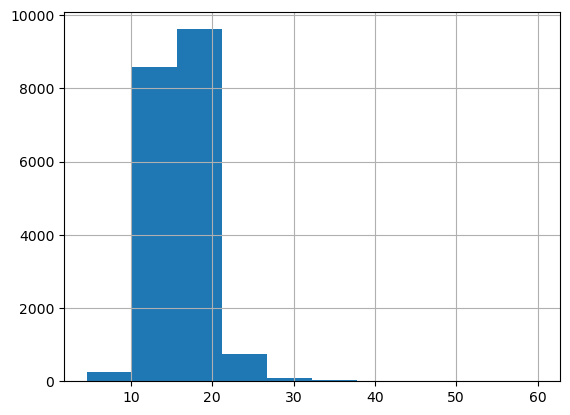

In [96]:
data.loc[data['rooms'] > 0, 'rooms_area'].hist()

In [97]:
data.loc[data['rooms'] > 0, 'rooms_area'].describe()

count    19351.000000
mean        16.263822
std          3.001613
min          4.550000
25%         14.333333
50%         16.000000
75%         18.000000
max         60.000000
Name: rooms_area, dtype: float64

In [98]:
whiskers(14, 18)

8.0 24.0


Максимальные средние значения комнат выглядит маловероятным, однако, квартиры с комнатами больше 25 кв. м. могут быть студиями. Изучим данные по картирам с комнатами меньше 10 кв. м. и больше 30 кв. м.


In [99]:
data.loc[(data['rooms_area'] < 10) & (data['rooms'] > 3), ['rooms_area', 'rooms', 'living_area', 'total_area']]
#.sample(50)
##data.loc[(data['rooms_area'] < 10) & (data['rooms'] > 2), ['rooms_area', 'rooms', 'living_area', 'total_area']]
#data.loc[(data['rooms_area'] < 10) & (data['rooms'] == 1), ['rooms_area', 'rooms', 'living_area', 'total_area']]

,rooms_area,rooms,living_area,total_area
542,5.720,5,28.6,40.0
2702,9.500,4,38.0,49.0
3081,9.200,4,36.8,48.3
3533,9.750,4,39.0,50.0
3838,9.400,4,37.6,49.0
...,...,...,...,...
22755,9.250,4,37.0,49.0
22892,9.500,4,38.0,49.1
22903,9.325,4,37.3,49.4
22914,9.450,4,37.8,69.6


In [100]:
#удалим аномальные значения квартир с маленькой площадью и большим количеством комнат
data = data.drop(data.query('rooms_area < 10').index)
len(data)

19307

In [101]:
#проверим очень просторные комнаты
data.loc[(data['rooms_area'] > 40) & (data['rooms'] > 0), ['rooms_area', 'rooms', 'living_area', 'total_area']]

,rooms_area,rooms,living_area,total_area
4973,54.0,1,54.0,84.00
6293,46.0,1,46.0,86.00
7602,45.0,1,45.0,76.65
8197,43.0,1,43.0,70.00
9093,40.4,1,40.4,77.90
10253,58.0,1,58.0,103.40
13015,53.7,1,53.7,86.50
13023,55.5,1,55.5,127.30
17520,60.0,1,60.0,95.00
22454,43.7,1,43.7,69.00


Оставим квартиры с такими параметрами, поскольку это могут быть дизайнерские решения, по объединению всего пространства квартиры в одну комнату. Квартир-студий среди данных строк нет, у тех квартир количество комнат = 0.

<Axes: >

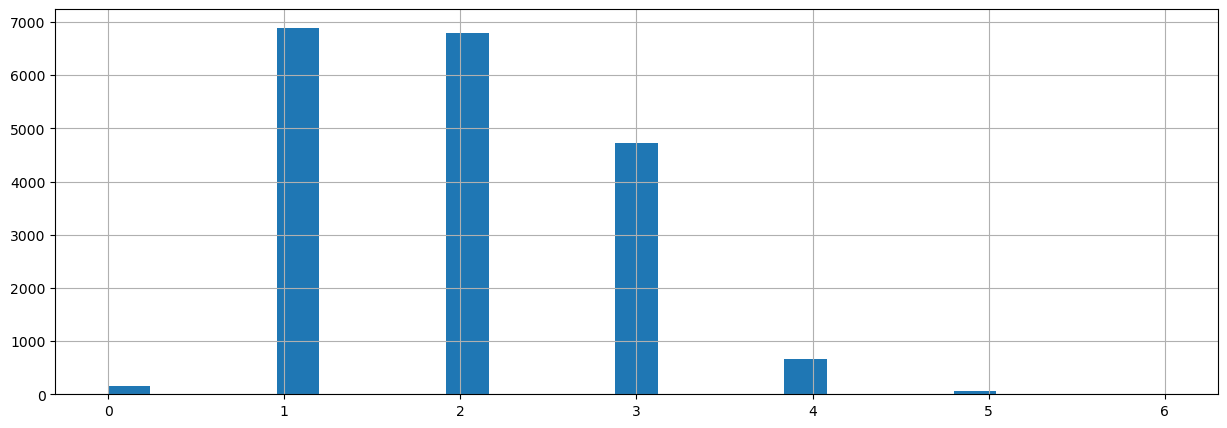

In [102]:
data.rooms.hist(bins=25, figsize=(15, 5))

Соотношение с начала анализа данного параметра не изменилось. 

### Высота потолков

<Axes: >

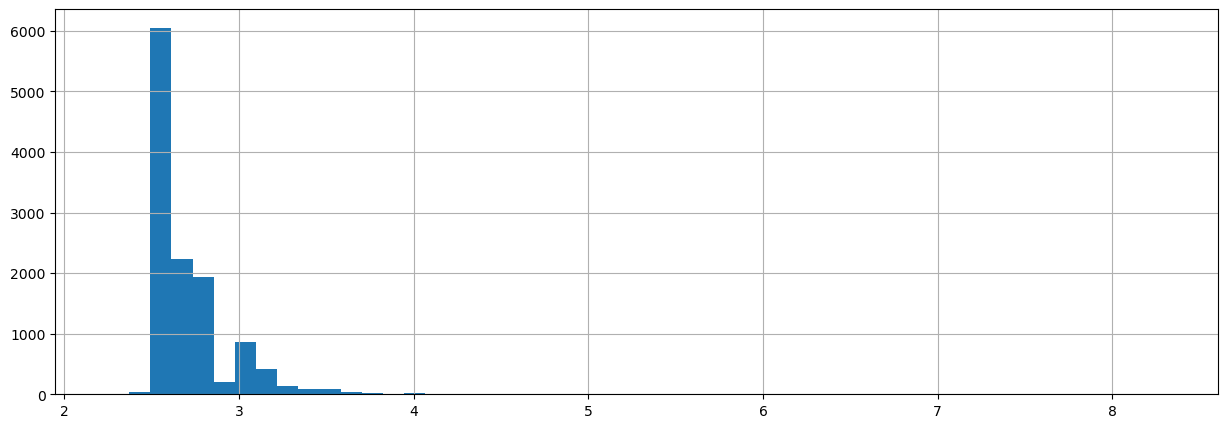

In [103]:
data.ceiling_height.hist(bins = 50, figsize=(15, 5))

Основная масса квартир сконцнтрирована до значения 4 м, мы видим два пика, один явный около 2,5 м, а другой около трех, редкими являются квартиры с потолками больше 3,5 м. Не будем считать такое значения аномалиями, поскольку существую двухуровневые квартиры, квартиры в исторических зданиях и тд. Изучим подробнее распределение данных и рассмотрим ближе данные в пределах нормы.

In [104]:
#рассмотрим какие значения есть 
data['ceiling_height'].sort_values().unique()

array([2.25, 2.26, 2.3 , 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51,
       2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62,
       2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73,
       2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84,
       2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95,
       2.96, 2.97, 2.98, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07,
       3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18,
       3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.3 , 3.31,
       3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.44,
       3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.52, 3.54, 3.55, 3.56, 3.6 ,
       3.62, 3.63, 3.65, 3.66, 3.67, 3.7 , 3.75, 3.78, 3.8 , 3.83, 3.84,
       3.85, 3.88, 3.9 , 3.95, 3.98, 4.  , 4.06, 4.1 , 4.15, 4.19, 4.2 ,
       4.25, 4.3 , 4.37, 4.4 , 4.5 , 4.8 , 8.  , 8.3 ,  nan])

In [105]:
data.ceiling_height.describe()

count    12148.000000
mean         2.696660
std          0.249997
min          2.250000
25%          2.500000
50%          2.600000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64

In [106]:
whiskers(2.5, 2.75)

2.125 3.125


<Axes: >

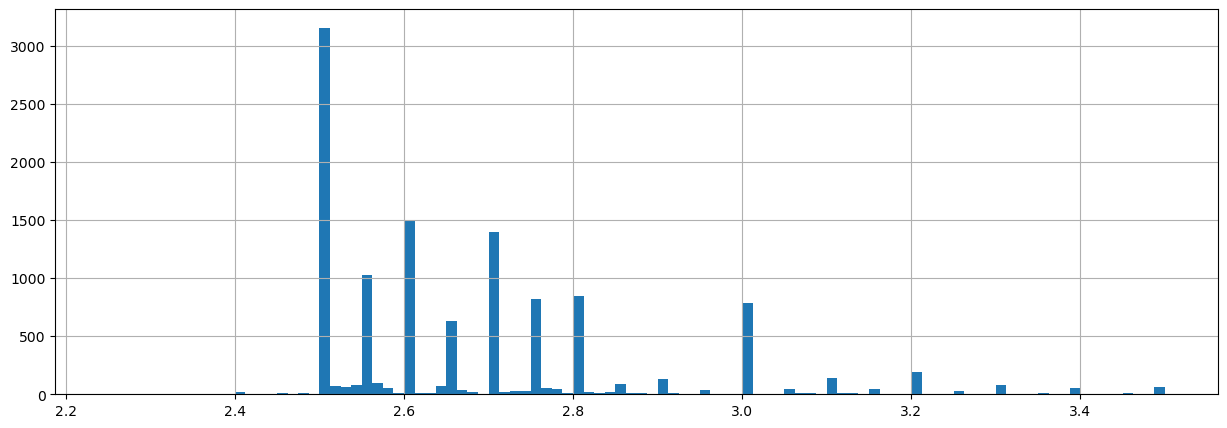

In [107]:
data.ceiling_height.hist(bins = 100, figsize=(15, 5), range=(2.25, 3.5))

Больше всего квартир с потолками 2.5 м, другие пики также находятся на круглых десятичных значениях - 2.6, 2.7, 2.8 м. Также распространены квартиры с потолками 2.55 м и 3 м. Однако превалирующее большинство квартир находится в диапазоне 2.5-2.8 метра. 

### Тип этажа

<Axes: >

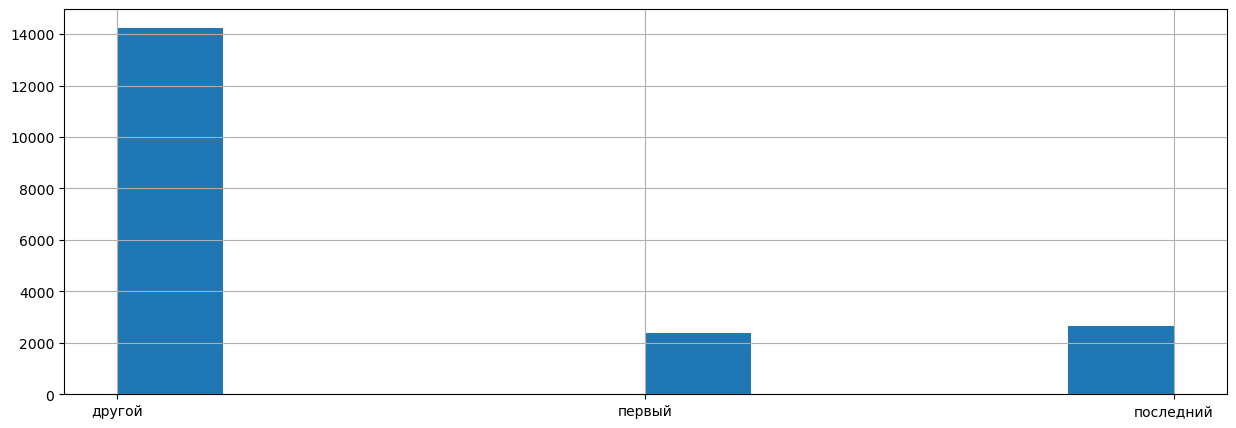

In [108]:
#тип этажа квартиры 
data.floor_category.hist(figsize=(15, 5))

На данной гистограмме мы видим ожидаемое соотноешние квартир: абсолютное большинство находятся не на первом и не на последнем этаже. На первом этаже продается меньше квартир, чем на последнем.

In [109]:
#определим долю каждого из столбцов
data['floor_category'].value_counts(1).round(2)

floor_category
другой       0.74
последний    0.14
первый       0.12
Name: proportion, dtype: float64

Около 3/4 квартир находятся на отличном от последнего и первого этажа. Квартир на первом и последнем примерно одинаковое количество. 

### Общее количество этажей в доме

<Axes: >

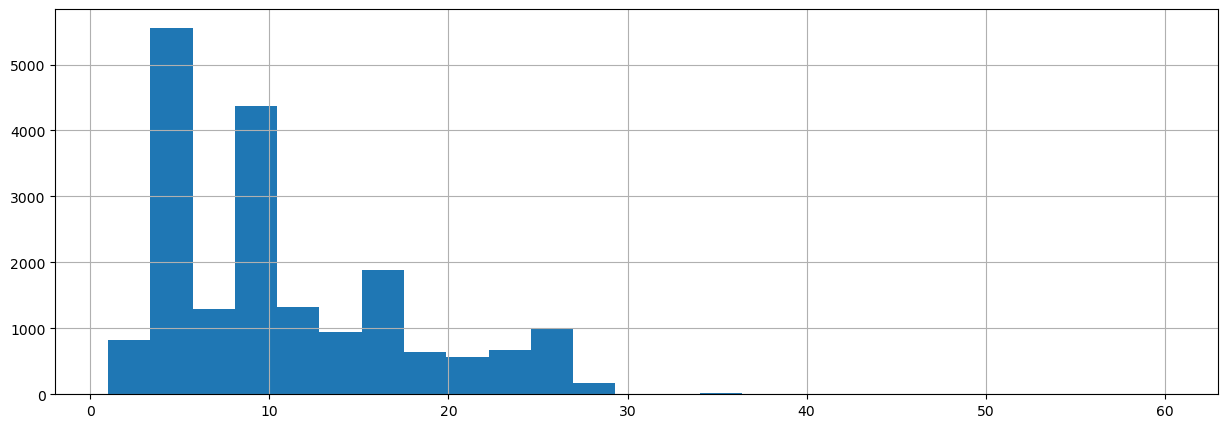

In [110]:
#общее количество этажей в доме
data.floors_total.hist(bins=25, figsize=(15, 5))

Самое высокое жилое здание в Санкт-Петербурге - [ЖК «Князь Александр Невский» с 37 этажами](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D1%85_%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B9_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0), а значит, что все значения выше - аномальные. Есть также высотный жилой комплекс в 32 этажа. 
Рассмотрим здания от 30 этажей, они должны находится все в Санкт-Петербурге и на одинаковом расстоянии от центра, так как должны все находиться в одном или двух зданиях. 

В остальной Ленинградской области самые многоэтажные жилые здания не превышают [29 этажей.](https://lenobldoma.ru/doma-po-etazham)

In [111]:
data.floors_total.describe()

count      19272.0
mean     10.799294
std       6.574899
min            1.0
25%            5.0
50%            9.0
75%           16.0
max           60.0
Name: floors_total, dtype: Float64

In [112]:
#проверим информацию о высотных зданиях
data.loc[data['floors_total'] >= 30, ['floors_total', 'locality_name', 'city_centers_nearest']]

,floors_total,locality_name,city_centers_nearest
397,36,Санкт-Петербург,20444
871,35,Санкт-Петербург,20444
1917,35,Санкт-Петербург,20444
2253,60,Кронштадт,49488
2966,35,Санкт-Петербург,20444
4855,35,Санкт-Петербург,20339
5749,35,Санкт-Петербург,20444
5807,36,Санкт-Петербург,20444
5808,35,Санкт-Петербург,20444
7236,35,Санкт-Петербург,20444


Все квартиры находятся на одном расстоянии от центра, а значит находятся в одном и том же здании, их можно оставить. Можно уточнить, какая точка в проекте считалась центром, для более точного определения, действительно ли данные квартиры находятся в самом высотном ЖК Санкт-Петербурга. 
Яндекс.Карты определили расстояние [примерно в 13.5 км до Центрального района](https://yandex.ru/maps/2/saint-petersburg/?ll=30.412401%2C59.894603&mode=routes&rtext=59.846165%2C30.485326~59.938180%2C30.365644&rtt=pd&ruri=ymapsbm1%3A%2F%2Fgeo%3Fdata%3DCgg1NzQ3MzA1ORJp0KDQvtGB0YHQuNGPLCDQodCw0L3QutGCLdCf0LXRgtC10YDQsdGD0YDQsywg0L_RgNC-0YHQv9C10LrRgiDQntCx0YPRhdC-0LLRgdC60L7QuSDQntCx0L7RgNC-0L3RiywgMTM40LoyIgoN8uHzQRV6Ym9C~ymapsbm1%3A%2F%2Fgeo%3Fdata%3DCgg1MzE4MzY2OBJO0KDQvtGB0YHQuNGPLCDQodCw0L3QutGCLdCf0LXRgtC10YDQsdGD0YDQsywg0KbQtdC90YLRgNCw0LvRjNC90YvQuSDRgNCw0LnQvtC9IgoN1-zyQRWzwG9C&z=11.73), когда у нас в данных это растояние равно 20 км. Так как разница не такая большая, существует вероятность, что это верные данные, оставим их в датафрейме.

In [113]:
#удаляем аномалии
data = data.drop(data.query('floors_total > 40').index)
len(data)

C:\Users\79104\AppData\Local\Temp\ipykernel_5432\3190572061.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data = data.drop(data.query('floors_total > 40').index)


19305

In [114]:
#проверим на другую аномалию: превышает ли номер этажа квартиры этажность всего здания
data.loc[data['floor'] > data['floors_total']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,publication_month,publication_year,floor_category,floor_type,city_centers_nearest_km,living_share,kitchen_share,other_share,other_area,rooms_area


<Axes: >

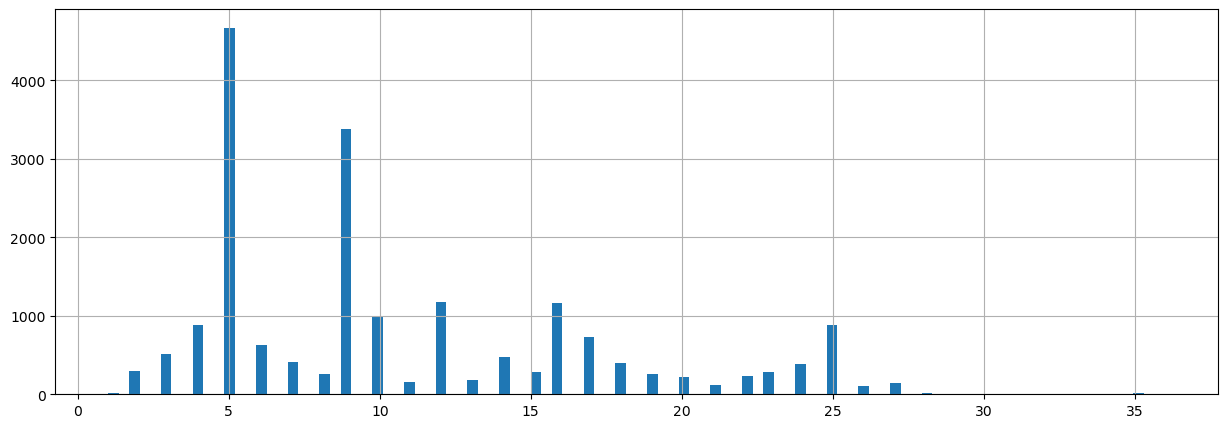

In [115]:
data.floors_total.hist(bins=100, figsize=(15, 5))

Больше всего квартир расположено в 5-этажных и 9-этажных зданиях, также распространены здания в 12, 16 и 25 этажей.

### Расстояние до центра города, м

<Axes: >

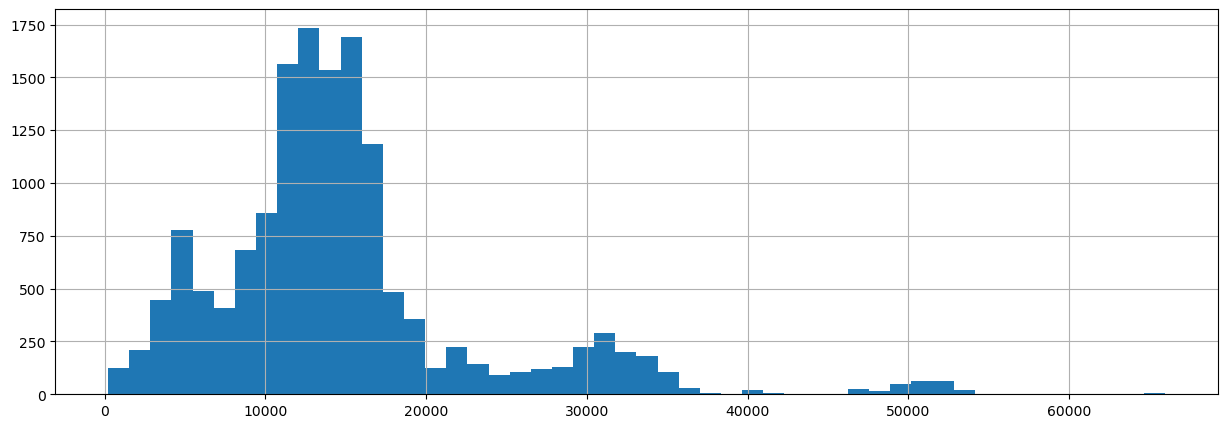

In [116]:
#расстояние до центра города в метрах
data.city_centers_nearest.hist(bins=50, figsize=(15, 5))

In [117]:
data.city_centers_nearest.describe()

count        14791.0
mean     14786.17869
std      8577.059428
min            208.0
25%          10348.5
50%          13478.0
75%          16554.5
max          65968.0
Name: city_centers_nearest, dtype: Float64

In [118]:
#проверим, какие населенные пункты расположены далеко от центра
data.loc[data['city_centers_nearest'] >= 45000, 'locality_name'].value_counts()

locality_name
Ломоносов             113
Кронштадт              83
Петергоф               22
Зеленогорск            21
поселок Молодежное      5
Name: count, dtype: int64

Указанные населенные пункты - внутригородские муниципальные образования в составе города федерального значения Санкт-Петербурга, поэтому и находятся отдаленно от центра - то есть Санкт-Петербурга.

<Axes: >

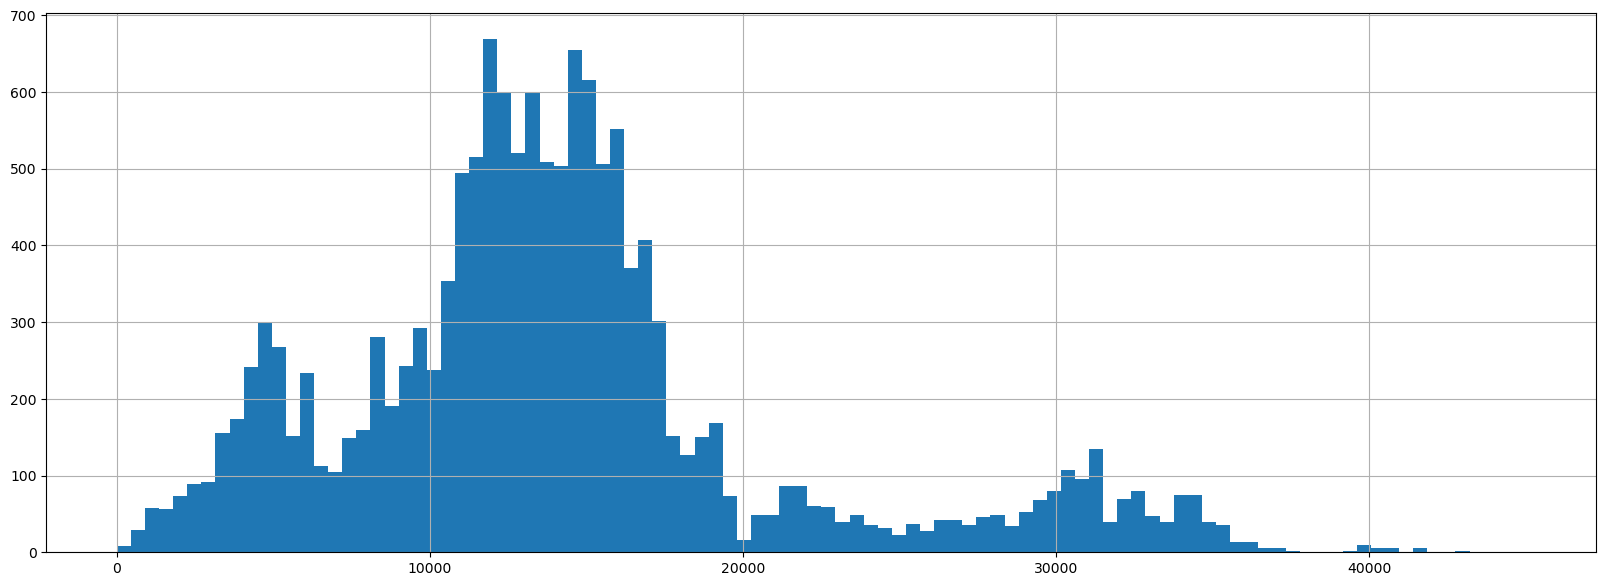

In [119]:
#рассмотрим ближе часть гистограммы с квартирами на меньшем расстоянии от центра
data.city_centers_nearest.hist(bins=100, figsize=(20, 7), range=(0, 45000))

Больше всего квартир расположено на расстоянии 11-15 км от центра, есть также пик на расстоянии около 5 км от центра, что может объясняться большим наличием поселков городского типа, в которых квартиры будут находиться не так далеко от центра. Квартиры на бóльших расстояниях расположены в населенных пунктах, относящихся к Санкт-Петербургу, чем и характеризуется небольшой пик у 30 км и 50 км (на гистограмме выше). 

### Расстояние до ближайшего парка

<Axes: >

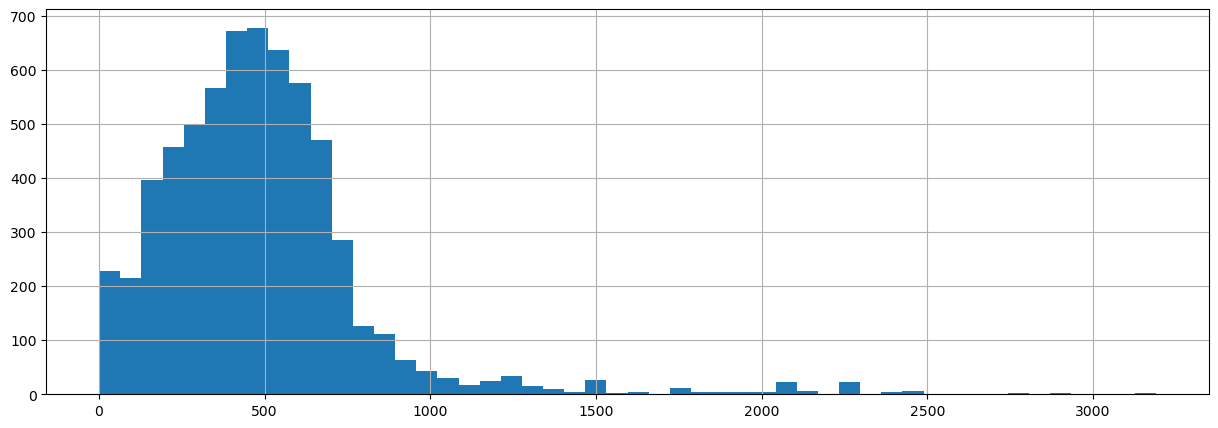

In [120]:
#расстояние до ближайшего парка
data.parks_nearest.hist(bins=50, figsize=(15, 5))

Большинство квартир находятся на расстоянии до 1 км от парка, рассмотрим ближе гистограмму и основные характеристики.

In [121]:
data.parks_nearest.describe()

count        6309.0
mean     494.280552
std      336.752365
min             1.0
25%           293.0
50%           459.0
75%           617.0
max          3190.0
Name: parks_nearest, dtype: Float64

In [122]:
whiskers(300, 620)

-180.0 1100.0


<Axes: >

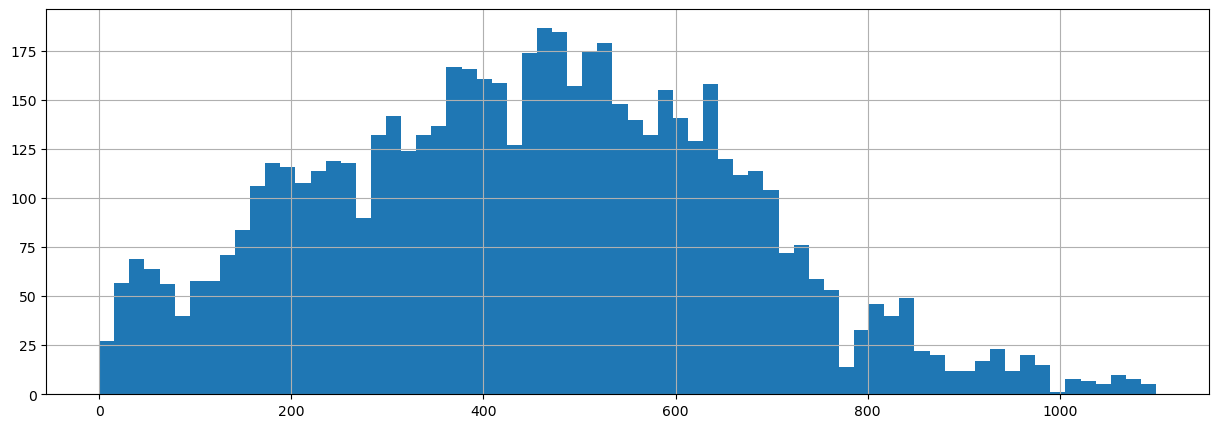

In [123]:
data.parks_nearest.hist(bins=70, figsize=(15, 5), range=(0, 1100))

In [124]:
data.loc[data['parks_nearest'] != 'NaN', 'locality_name'].value_counts()

locality_name
Санкт-Петербург      5610
Пушкин                178
Петергоф              130
Колпино               124
Кронштадт              77
Сестрорецк             65
Красное Село           37
Павловск               22
поселок Стрельна       19
Зеленогорск            15
unknown                12
Ломоносов              11
поселок Парголово       9
Name: count, dtype: int64

Основная масса квартир расположена на расстоянии от 150 до 700 местров от парка. Большинство квартир с парками расположены в Санкт-Петербурге.

**Вывод по наблюдениям:**
- Нормой общей площади для обычной квартиры является значение 30-65 кв. м., более редкими будут совсем маленькие квартиры-студии площадью меньшей, чем 30 кв. м., а также более просторные квартиры площадью от 75 до 120 кв. м.  Площадь самых часто продаваемых квартир: 40-46 кв.м.
- Обычными значениями для жилой площади является квардратура от 15 до 30 кв., для квартир с большей площадью это значение увеличивается до 40-45, но могут встречаться квартиры и с жилой площадью до 80 кв. м. Размеры кухни в основном составляют от 6 до 10 кв. м, но в квартирах больше могут быть и площадью 11-15 кв. м. Встречаются значения больших кухонь, если кухню совмещают со столовой или гостинной. 
- Стоимость квартир в среднем составляет от 3 до 6 млн. руб, чаще всего осуществляются покупки недвижимости в диапазоне 3-4,5 млн. рублей.
- Больше всего квартир с 1 или 2 комнатами, довольно часто встречаются и квартиры 3-комнатные, квартиры от 4 комнат встречаются довольно редко. Больше 6 комнат для данного класса квартир не встречается.
- В подавляющем большинстве квартир потолки равны 2.5-2.8 метрам, встраются и потолки 3 м., остальные значения - редкость. Бывают квартиры, в которых есть второй свет или многоуровневые квартиры, для них нужна особая отметка, чтобы можно было отделить такие значения от аномальных.
- Больше всего квартир расположено в 5-этажных и 9-этажных зданиях, также распространены здания в 12, 16 и 25 этажей. Максимальное количество этажей в здании в Санкт-Петербурге - 37, в общем в Ленинградской области - 30.
- В основном квартиры расположены на расстоянии 11-15,5 км от центра, в небольших населенных пунктах могут находиться и в пределах 5-7 км, большие расстояния от центра (от 30 км.) объясняются населенными пунктами, находящимися в составе Санкт-Петербурга, но выделенными как отдельные в данном исследовании.
- Квартины в основном расположены в пределах 1,1 км от парка, чаще на расстоянии от 150 до 700 местров.

### Количество дней размещения объявления

<Axes: >

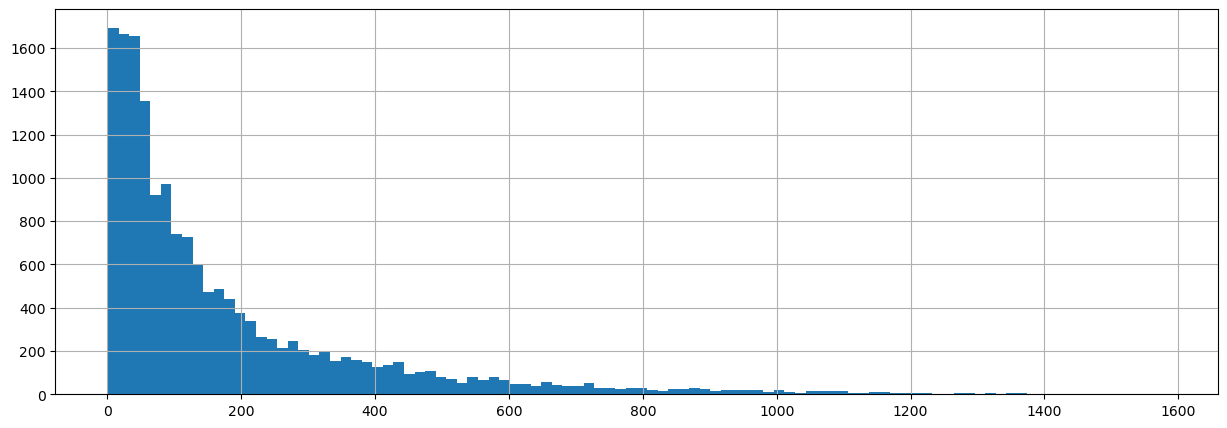

In [125]:
#изучение столбца days_exposition
data.days_exposition.hist(bins=100, figsize=(15, 5))

На гистограмме видно, что большее число квартир продается за меньшее время. Есть аномальные значения квартир, которые продавались больше нескольких лет, или же их объявления были убраны из базы непроданными по прошествии определенного времени из-за отсутствия активности. Определим крайние точки для нормальных значений. 

In [126]:
#средняя и медиана
data.days_exposition.describe()

count       16803.0
mean     179.942748
std      216.124027
min             1.0
25%            43.0
50%            98.0
75%           231.0
max          1580.0
Name: days_exposition, dtype: Float64

In [127]:
whiskers(43, 231)

-239.0 513.0


**Среднее время продажи** квартиры - 180 дней, то есть около полугода.

**Медианное время продажи** квартиры меньше - 98 дней, что соответствует чуть больше 3 месяцам - примерно половине от среднего значения. 

<Axes: >

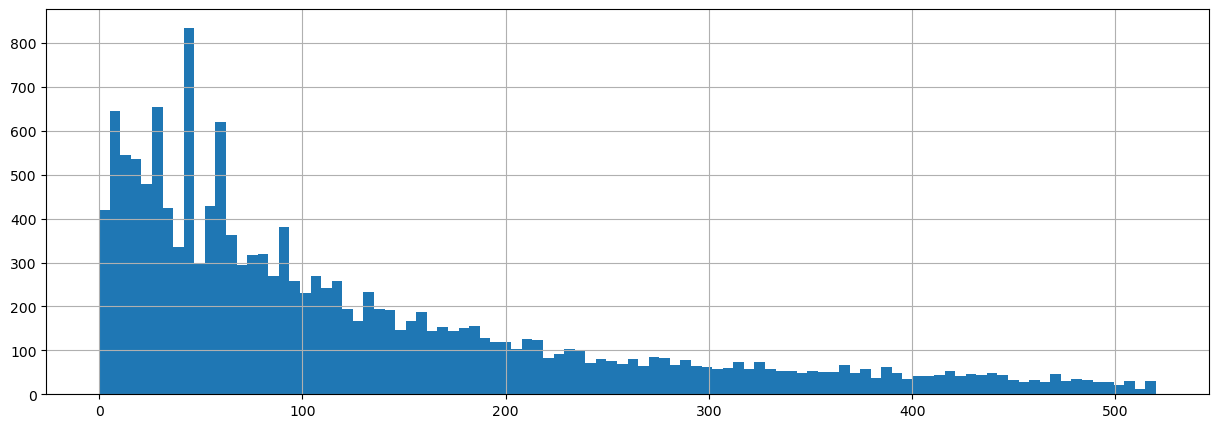

In [128]:
#построим гистаграмму с квартирами, которые продали меньше, чем за 1.5 года
data.days_exposition.hist(bins=100, figsize=(15, 5), range=(0, 520))

Есть пик примерно на значении 50, рассмотрим данные ближе.

<Axes: >

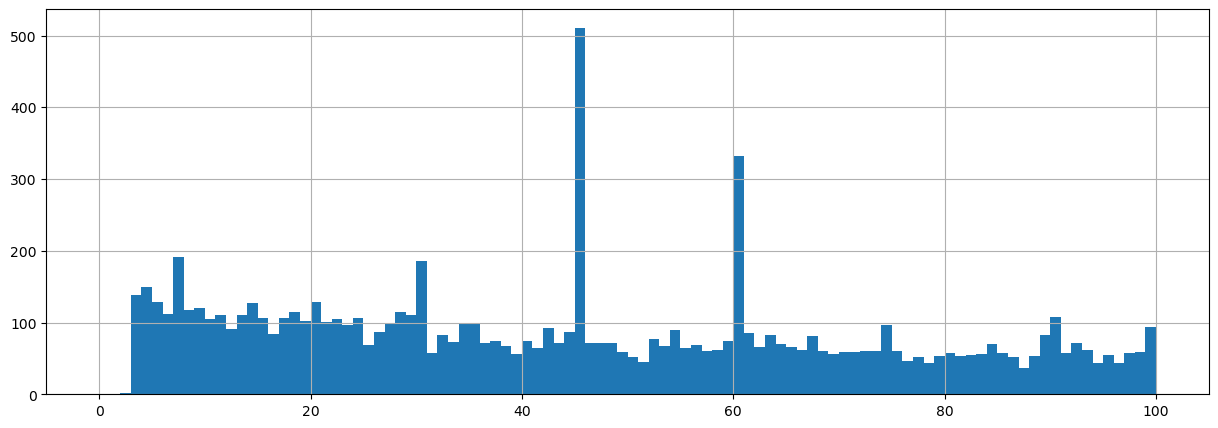

In [129]:
data.days_exposition.hist(bins=100, figsize=(15, 5), range=(0, 100))

Больше всего квартир было продано за 46 дней, затем наиболее частотное значение - 60 дней. 

В среднем квартира продается за 3 месяца. **Быстрыми** продажами будем считать те, которые были осуществлены **быстрее, чем за 1,5 месяца** (ориентируемся на первый квартиль), **долгими** те, что превышают 231 день, то есть **около 8 месяцев**. **Необычайно долгими** будем считать продажи, которые **длятся более полутора лет**, то есть больше максимального значения правого "уса". Можно настроить алгоритмы системы на периодическую проверку объявлений, которые находятся на сайте продажи квартир дольше этого периода.

## Зависимость цены от различных факторов

Для определения от каких факторов больше всего зависит цена квартиры рассмотрим предложенные заданием характеристики: общую площадь, жилую площадь, площадь кухни, количество комнат, тип этажа и дату публикации (день недели, месяц, год). Сначала посмотрим, какая существует корреляция между данными:

In [130]:
#рассчет корреляции с ценой для каждой характеристики
needed_col = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'publication_weekday', 'publication_month', 'publication_year']

for col in needed_col:
    correlation = data.last_price.corr(data[col])
    print(f'{col}: {correlation}')

total_area: 0.7451871915281963
living_area: 0.6235826381796239
kitchen_area: 0.5555057135153622
rooms: 0.46688520561857577
floor_type: 0.041273155212688144
publication_weekday: -0.010670931823911977
publication_month: 0.007748648774923205
publication_year: -0.009689565071725066


Исходя из полученных данных цена не зависит от: типа этажа, дня недели публикации, месяца и года публикации. При этом существует некая зависимость от общей площади, жилой площади, площади кухни и в меньшей степени от количества комнат. Проиллюстрируем зависимость при помощи графиков.

<Axes: title={'center': 'Зависимость цены от общей площади'}, xlabel='Общая площадь', ylabel='Стоимость квартиры'>

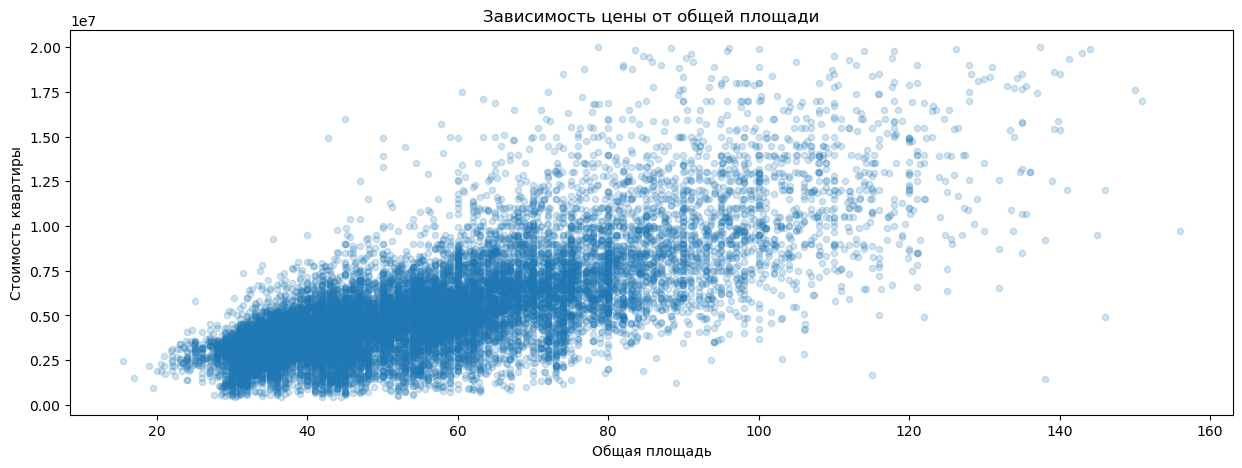

In [131]:
#зависит ли цена от общей площади
data.plot(x='total_area', 
          y='last_price', 
          kind='scatter', 
          title='Зависимость цены от общей площади',
          xlabel='Общая площадь',
          ylabel='Стоимость квартиры',
          figsize=(15, 5),
          alpha=0.2)

Можно определить прямую зависимость цены от площади - чем больше квартира по площади, тем больше цена на нее. Более четко это видно на квартирах до 60-65 кв. м., далее разброс цен становится более ярким.

<Axes: title={'center': 'Зависимость цены от жилой площади'}, xlabel='Жилая площадь', ylabel='Стоимость квартиры'>

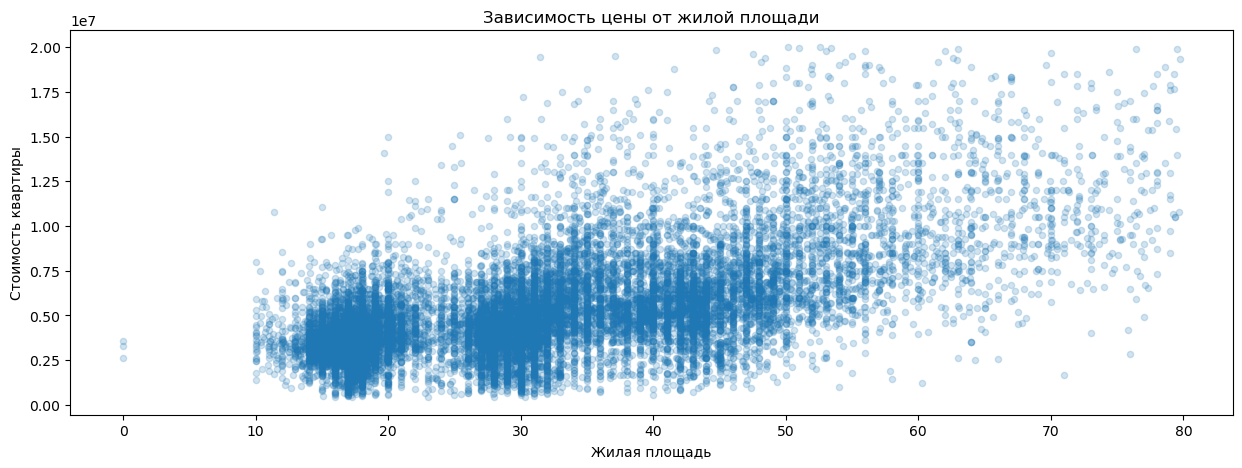

In [132]:
#зависит ли цена от жилой площади
data.plot(x='living_area', 
          y='last_price', 
          kind='scatter', 
          title='Зависимость цены от жилой площади',
          xlabel='Жилая площадь',
          ylabel='Стоимость квартиры',
          figsize=(15, 5),
          alpha=0.2)

Поскольку основная доля квартир стоит до 6 миллионов, график более концентрированный слева, тем не менее, на нем мы видим прямую зависимость цены от жилой площади, хотя и менее явную, чем от общей площади. Это происходит потому что в жилая площадь не всегда увеличивается с увеличением общей площади, а соответственно и цены, так как кухня может быть соединена с гостиной и эта жилая часть квартиры будет считаться частью кухни.

<Axes: title={'center': 'Зависимость цены от площади кухни'}, xlabel='Площадь кухни', ylabel='Стоимость квартиры'>

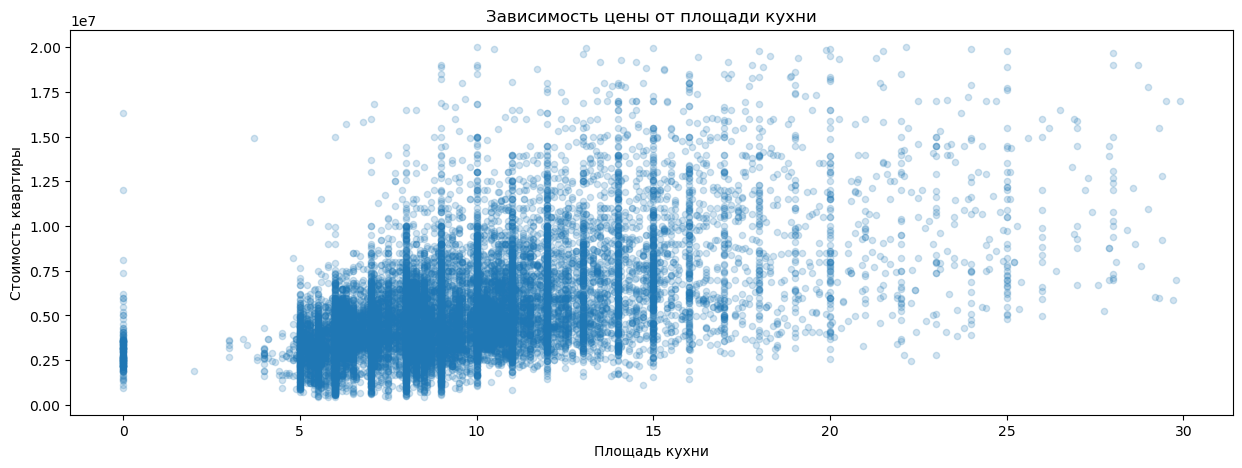

In [133]:
#зависит ли цена от площади кухни
data.plot(x='kitchen_area',
          y='last_price', 
          kind='scatter', 
          title='Зависимость цены от площади кухни',
          xlabel='Площадь кухни',
          ylabel='Стоимость квартиры',
          figsize=(15, 5),
          alpha=0.2)

Зависимость в данном случае прослеживается менее явная, поскольку не всегда с увеличением площади квартиры увеличивается площадь кухни. Необходимо также помнить о совмещении кухни и гостиной.

<Axes: title={'center': 'Зависимость цены от количества комнат'}, xlabel='rooms'>

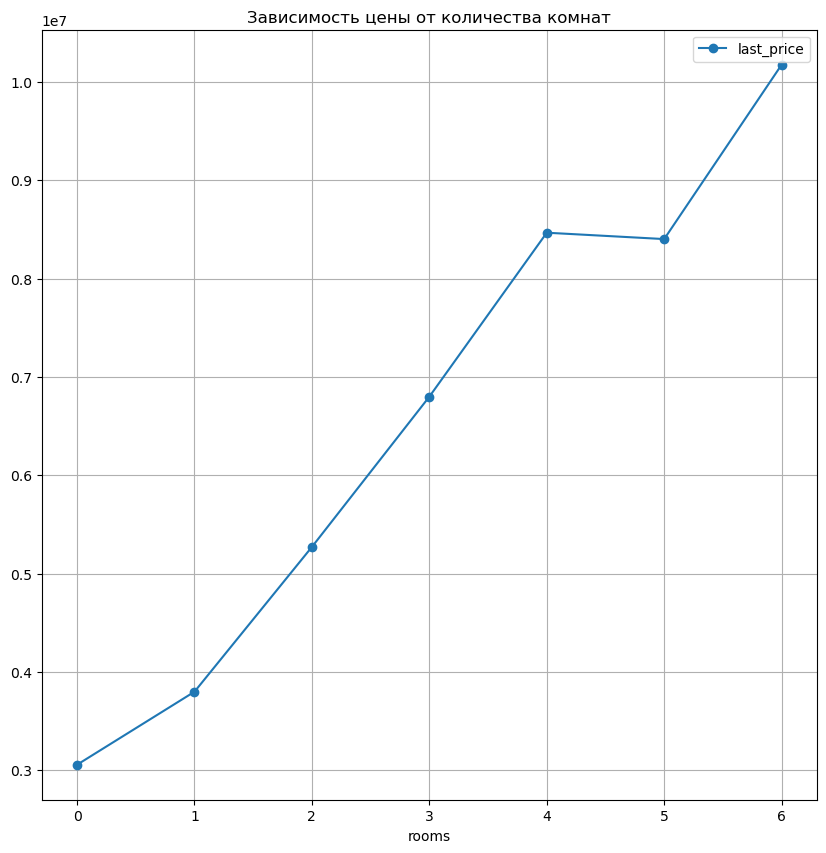

In [134]:
#зависит ли цена от количества комнат
(data
    .pivot_table(index='rooms', values='last_price')
    .plot(y='last_price', style='o-', figsize=(10, 10), grid=True, title='Зависимость цены от количества комнат')
)

Как мы видели ранее, данных по квартирам от 4 не так много, особенно это касается квартир с 5 и 6 комнатами, поэтому линия на данных значениях не такая ровная, как ожидалось, однако, на графике мы можем увидеть прямую зависимость - с увеличением количества комнат возрастает цена.

<Axes: title={'center': 'Зависимость цены от типа этажа'}, xlabel='floor_category'>

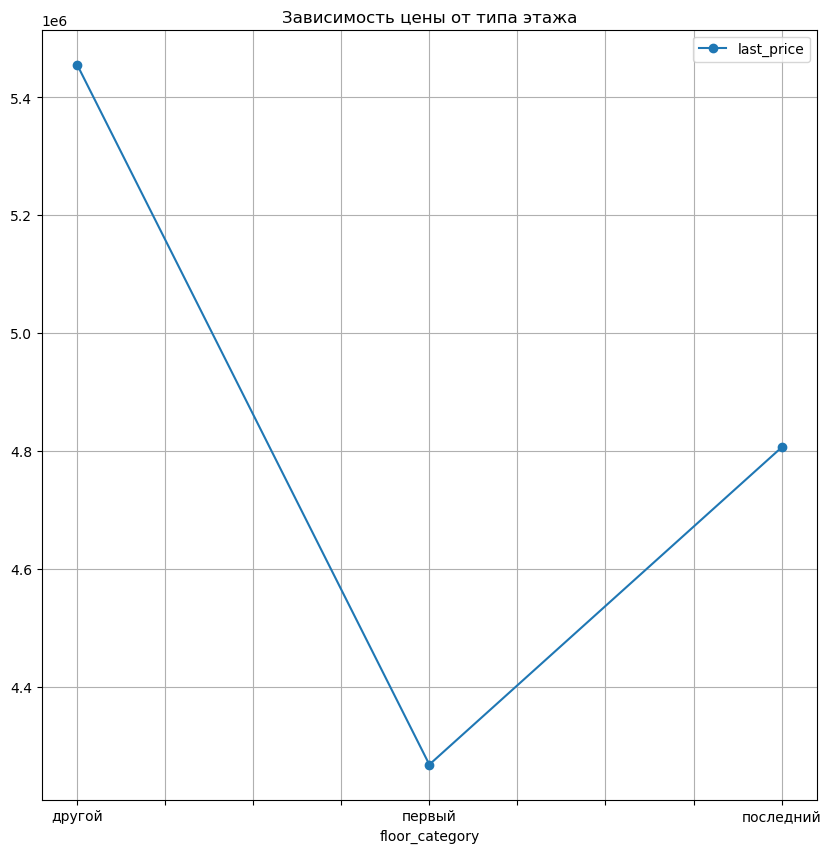

In [135]:
#зависит ли цена от этажа, на котором расположена квартира
(data
    .pivot_table(index='floor_category', values='last_price')
    .plot(y='last_price', style='o-', figsize=(10, 10), grid=True, title='Зависимость цены от типа этажа')
)

Хотя корреляция не показала большой зависимости, мы можем заметить, что цены на квартиры на первом этаже ниже, чем на квартиры на остальных этажах. При этом квартиры на последнем этаже также в среднем меньше, чем на других. 

<Axes: title={'center': 'Зависимость цены от дня недели'}, xlabel='publication_weekday'>

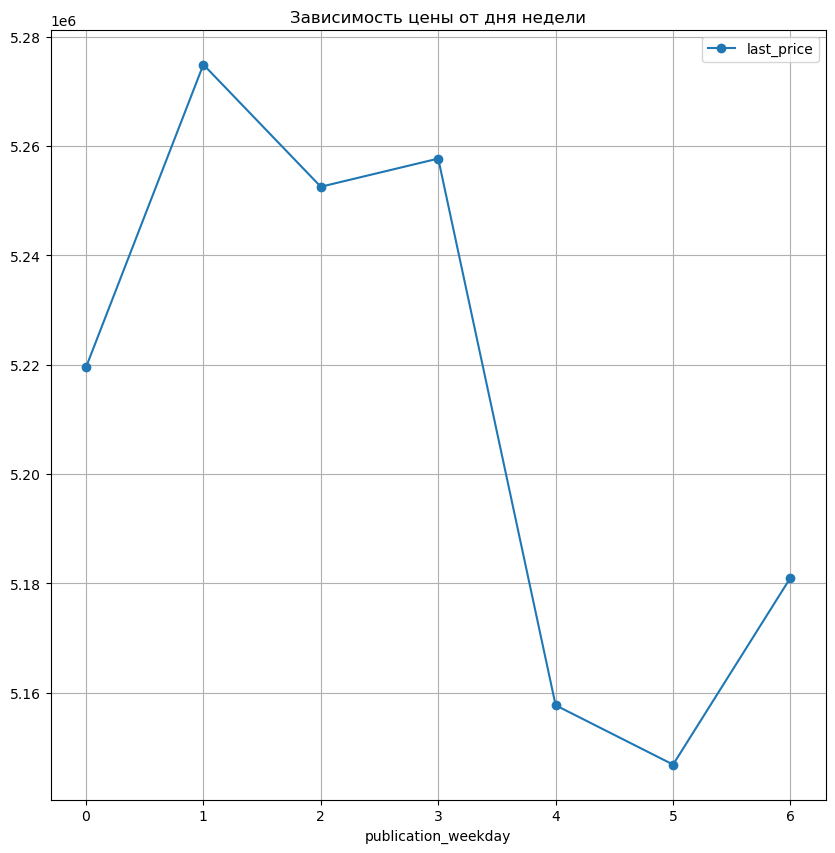

In [136]:
#зависит ли цена от даты размещения от деня недели
(data
    .pivot_table(index='publication_weekday', values='last_price')
    .plot(y='last_price', style='o-', figsize=(10, 10), grid=True, title='Зависимость цены от дня недели')
)

In [137]:
data['publication_weekday'].value_counts().to_frame()

,count
publication_weekday,
3,3475
1,3442
4,3297
2,3232
0,2964
5,1540
6,1355


Данные распределены равномерно, на выходных делают меньше публицакий объявлений, чем на рабочей неделе. По оси y на графике можно увидеть, что стоимость квартиры не сильно варьирует, цена не зависит от дня публикации.

<Axes: title={'center': 'Зависимость цены от месяца'}, xlabel='publication_month'>

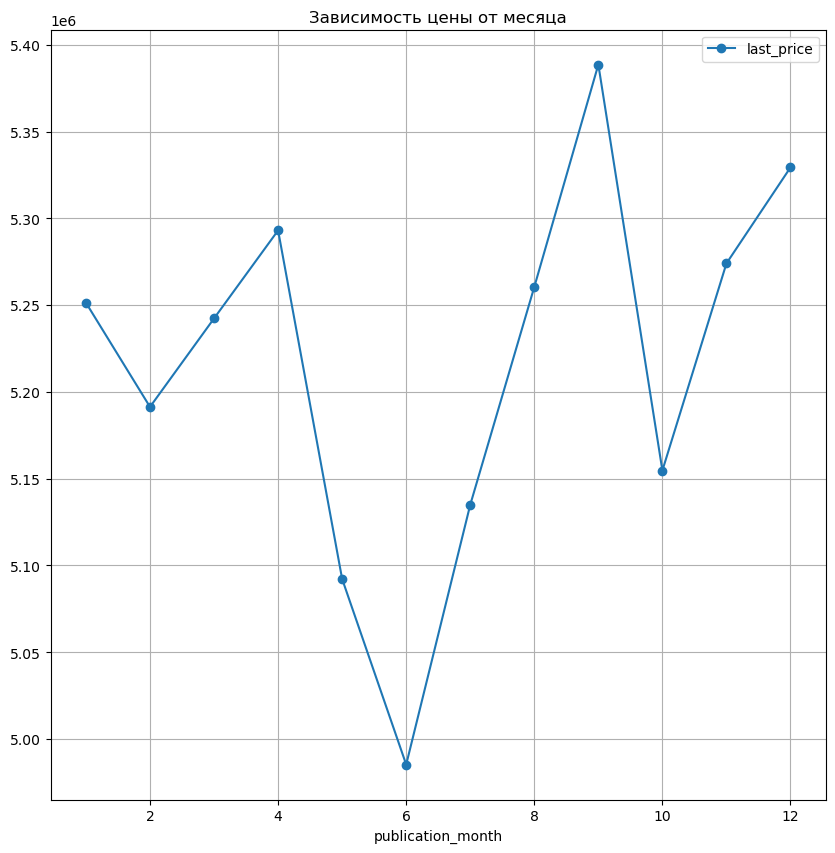

In [138]:
#зависит ли цена от даты размещения от месяца
(data
    .pivot_table(index='publication_month', values='last_price')
    .plot(y='last_price', style='o-', figsize=(10, 10), grid=True, title='Зависимость цены от месяца')
)

Как и в случае с днем недели, стоимость квартиры не зависит от месяца публикации объявления о продаже. 

<Axes: title={'center': 'Зависимость цены от года'}, xlabel='publication_year'>

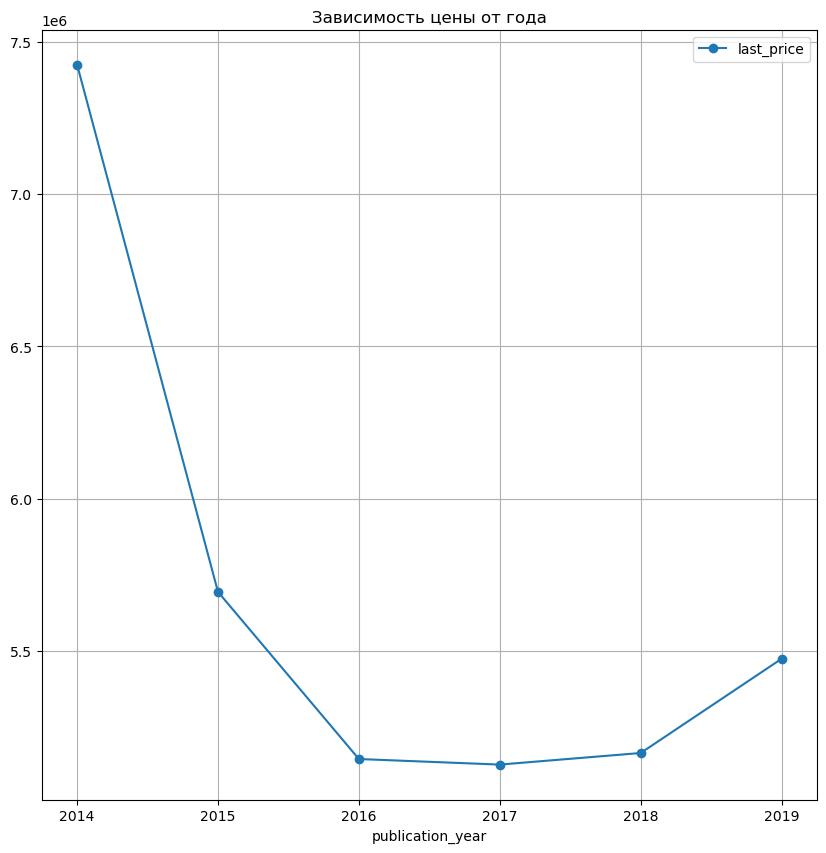

In [139]:
#зависит ли цена от даты размещения от года
(data
    .pivot_table(index='publication_year', values='last_price')
    .plot(y='last_price', style='o-', figsize=(10, 10), grid=True, title='Зависимость цены от года')
)

Видим спад цен с годами, оценим распределение количества данных по годам:

In [140]:
#посмотрим распределение данных по годам
data['publication_year'].value_counts().to_frame()

,count
publication_year,
2017,6865
2018,6756
2019,2361
2016,2297
2015,929
2014,97


In [141]:
#выведем среднюю и медиану по ценам в разные года
yeas_pivot = data.pivot_table(index='publication_year', values='last_price', aggfunc=['mean', 'median'])
yeas_pivot.columns =['Средняя цена', 'Медианная цена']
yeas_pivot

,Средняя цена,Медианная цена
publication_year,,
2014,7.425657e+06,6051250.0
2015,5.693307e+06,4950000.0
2016,5.144141e+06,4390000.0
2017,5.125878e+06,4390000.0
2018,5.163910e+06,4500000.0
2019,5.473550e+06,4950000.0


Количество данных по 2014 году нерепрезентативно, из-за чего на графике мы наблюдаем такой выброс, в среднем цена на квартиры за данный период лет не менялась сильно, было небольшое понижение в 2016-2018.

In [142]:
#проверим гипотезу об уменьшении площади продаваемых квартир
area_pivot = data.pivot_table(index='publication_year', values='total_area', aggfunc=['mean', 'median'])
area_pivot.columns =['Средняя площадь', 'Медианная площадь']
area_pivot

,Средняя площадь,Медианная площадь
publication_year,,
2014,70.359072,69.00
2015,59.804736,57.00
2016,55.797370,51.50
2017,54.692093,50.00
2018,53.923834,49.55
2019,53.691673,50.40


**Вывод:**

Цена может зависеть от:
- общей площади
- жилой площади
- площади кухни
- количества комнат
- расположена ли квартира на 1 этаже

Цена не зависит от дня, месяца или года публикации (за период исследования).

### Средняя цена квадратного метра в 10 населенных пунктах с большим числом объявлений

In [143]:
#выделим 10 населенных пунктов с наибольшим числом объявлений
top_10 = data.pivot_table(index='locality_name', values='m2_price', aggfunc=['count', 'mean'])
top_10.columns = ['Количество квартир', 'Средняя цена кв. м.']
#создадим копию для ответа на вопрос ниже
locality_m2_range = top_10.copy()
top_10 = top_10.sort_values(by='Количество квартир', ascending=False).head(10)
top_10

,Количество квартир,Средняя цена кв. м.
locality_name,,
Санкт-Петербург,12616,108089.850974
поселок Мурино,438,85681.399932
поселок Шушары,385,78788.370675
Всеволожск,343,67038.240262
Колпино,313,75349.359776
Пушкин,308,101880.391786
поселок Парголово,287,90500.239582
Гатчина,279,68464.628208
деревня Кудрово,234,92218.405855


In [144]:
#расположим города в порядке убывания средней цены кв. м.
top_10.sort_values(by='Средняя цена кв. м.', ascending=False)

,Количество квартир,Средняя цена кв. м.
locality_name,,
Санкт-Петербург,12616,108089.850974
Пушкин,308,101880.391786
деревня Кудрово,234,92218.405855
поселок Парголово,287,90500.239582
поселок Мурино,438,85681.399932
Петергоф,183,83324.359617
поселок Шушары,385,78788.370675
Колпино,313,75349.359776
Гатчина,279,68464.628208


В основном населенные пункты - внутригородские муниципальные образования или города/поселки находящиеся близко к Санкт-Петербургу. Вероятно, в этих населенных пунктах чаще всего продают недвижимость, так как в больших городах и в соседних с ними населенных пунктах люди более мобильны и жизнь более изменчивая и актиная. 

Чем дальше от Санкт-Петербурга и от центральных магистралей находится населенный пункт, тем меньше цена.
<img src='https://ibb.co/rRTCQ9Ss' width="420">

In [145]:
#определим, в каких населенных пунктах самая высокая и низкая стоимость кв. м.
locality_m2_range.sort_values(by='Средняя цена кв. м.')

,Количество квартир,Средняя цена кв. м.
locality_name,,
деревня Старополье,1,10368.660000
деревня Ям-Тесово,1,12328.770000
поселок Совхозный,1,12555.560000
городской поселок Ефимовский,1,12686.570000
поселок Тесово-4,1,12931.030000
...,...,...
Кудрово,148,99704.364257
Пушкин,308,101880.391786
Сестрорецк,153,102971.980458


Квартиры с самым дорогим квадратным метром находятся вблизи от Санкт-Петербурга, являются его муниципальными образованиями или, как  в случае Сестрорецка, находятся на побережьи. 

Самые дешевые квартиры находятся в маленьких населенных пунктах и на большом расстоянии от главного города области.

### Средняя стоимость на разном удалении от центра

In [146]:
#создадим переменную с данными о квартирах из Санкт-Петерурга
SP_data = data.loc[data['locality_name'] == 'Санкт-Петербург']

In [147]:
#округлим до целых значений
SP_data['city_centers_nearest_km'] = SP_data['city_centers_nearest_km'].round()
SP_data['city_centers_nearest_km']

C:\Users\79104\AppData\Local\Temp\ipykernel_5432\2480697142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP_data['city_centers_nearest_km'] = SP_data['city_centers_nearest_km'].round()


0        16.0
2        14.0
9        15.0
10       14.0
15       14.0
         ... 
23688    14.0
23689    16.0
23690     6.0
23691     4.0
23694     4.0
Name: city_centers_nearest_km, Length: 12616, dtype: float64

In [148]:
#создадим сводную таблицу со средней ценой квартиры на каждом километре от центра
SP_pivot = SP_data.pivot_table(index='city_centers_nearest_km', values='last_price')
SP_pivot.columns = ['Средняя стоимость квартиры']
SP_pivot

,Средняя стоимость квартиры
city_centers_nearest_km,
0.0,9.199000e+06
1.0,9.957407e+06
2.0,9.161444e+06
3.0,8.179521e+06
4.0,8.706037e+06
5.0,8.757161e+06
6.0,8.087021e+06
7.0,7.554896e+06
8.0,7.505344e+06


<Axes: title={'center': 'Зависимость цены от расстояния'}, xlabel='Среднее растояние до центра, км'>

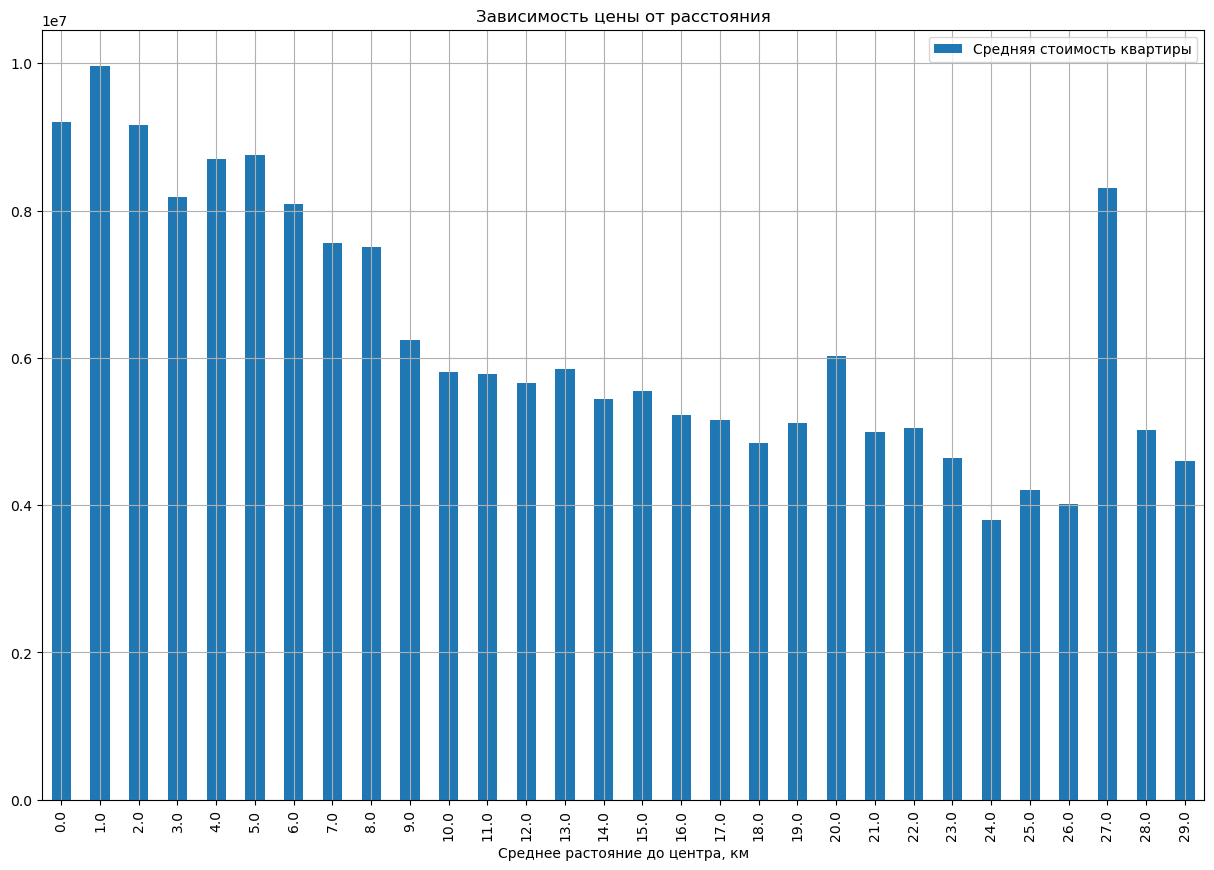

In [149]:
#отразим данные на графике
SP_pivot.plot(y='Средняя стоимость квартиры',
              kind='bar',
              figsize=(15, 10),
              grid=True,
              title='Зависимость цены от расстояния',
              xlabel='Среднее растояние до центра, км')

На графике отражена линейная зависимость цены от удаления от центра - чем ближе к центру, тем средняя цена больше. Незначительные превышения последующими столбцами соседних предыдущих могут объясняться различиями в благоустроенности в районах, в которых расположены квартиры на примерно одинаковом удалении от центра. Также заметим два пика - на расстоянии 20 км и на расстоянии 27 км.   
Как мы выяснили ранее, самый высотный ЖК в Санкт-Петербурге расположен на расстоянии 20 км от центра, квартиры в этом доме считают класса комфорт, поэтому цена за них может быть повышена. 

Посмотрим на данные по квартирам на расстоянии 27 км.  

In [150]:
SP_data.query('city_centers_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,publication_month,publication_year,floor_category,floor_type,city_centers_nearest_km,living_share,kitchen_share,other_share,other_area,rooms_area
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,NaN,...,11,2017,другой,1,27.0,0.41,0.34,0.25,19.0,15.0
5961,6,2250000,32.0,2018-02-27,1,NaN,2,16.5,2,NaN,...,2,2018,последний,2,27.0,0.52,0.22,0.26,8.5,16.5


Поскольку в данном срезе слишком мало значений, а между ценами большая разница, средний показатель оказался значительно выше ожидаемого. Показатель по расстоянию 27 км. будем считать выбросом. 

## Вывод

*Предобработка данных*
- В датафрейме, состоящем из 23699 строк, были обнаружены пропуски данных как в столбцах, заполненных респондентами, так и в столбцах, добавленных автоматически на основе картографических данных, в общей сумме в 14 столбцам. Было возможно обработать и заполнить без искажения результатов только часть из них: 0 были заполнены те пропуски, где предполагалось возможным отсутствие указанного элемента в квартире (балкона, кухни в студиях, выделенной жилой площади в квартирах с открытой планировкой), пропуски в столбце с названиями населенных пунктов были заменены на 'unknown'.

- Были удалены неявные дубли в названиях населенных пунктов, явные дубли не были обнаружены. Для более эффективной и оптимальной работы были изменны типы данных, а также заменено название столбца 'cityCenters_nearest'. Были изменены аномальные значения по высоте потолков: данные в 10 раз больше реальных значений.

- Для анализа по дополнительным параметрам были добавлены новые столбцы с днем недели, месяцем и годом выставления на продажу квартиры, с типом этажа, ценой одного квадратного метра и расстоянием до центра в километрах. Позднее для анализа внутренней непротиворечивости данных были добавлены новые столбцы: о доле занимаемой жилой площадью, площадью кухни и остальной нежилой площадью от всей квартиры, а также среднее значение площади одной комнаты.


*Факторы формирования цены квартиры, скорость продажи*
- В результате данного исследования было обнаружено, что в среднем квартиры продаются за период от 3 до 6 месяцев, быстрыми продажами считаются те, которые были осуществлены за 1,5 месяца, а долгими - от 8 месяцев. При этом абсолютное большинство квартир из архива продавались за период полтора года, но были и аномально долгие продажи, на которые стоит обратить внимание (см. рекомендации). 
- Цена в больщей степени зависит от общей площади квартиры, существует прямая зависимость: чем больше площадь, тем больше цена. Более слабая, но также прямая зависимость видна и для жилой площади и площади кухни, а также для количества комнат, но данные параметры связаны с общей площадью. Зависимость слабее, так как могут встречаться и просторные квартиры с малым количеством комнат, или квартиры, где под кухню выделена большая доля квартиры, так как кухня объединена с гостиной, или же просторные квартиры, где кухня не увеличивается пропорционально с увеличением площади квартиры, так как кухни в пределах 15-20 кв. м. может быть достаточно. В среднем цена на квартиры на первом этаже ниже, чем на остальныех.
- Цена за квадратный метр квартиры тем больше, чем ближе она к Санкт-Петербургу, наибольшая часть недвижимости продается в этом городе или в соседних населенных пунктах из-за большей мобильности и активности людей. С удалением от города и основных магистралей цена на кв. м. уменьшается. В самом городе Санкт-Петербурге на цену на кв. м. квартиры также влияет расстояние: чем ближе к центру, тем выше цена. Исключения могут составлять элитные или престижные районы, здания класса комфорт в спальных районах, цена на которые будет выше средних значений.
- Цена не зависит от дня, месяца и года публикации, по крайеней мере за период с 2015 по 2019 год, ситуация на рынке была стабильной, так как не было сильных экономических потрясений.



*Определение аномалий и мошенничества*
- Сложность в определении аномалий в данном исследовании заключается в том, что существует разная норма для разного класса жилья: категории жилья определяются на основе таких критериев как средняя цена за кв. м., расположение квартиры (исторические или престижные районы), высота потолков, минимальная площадь кухни, минимальная площадь квартиры в зависимости от количества комнат. 
- В связи с ограниченностью по времени выполнения проекта было решено разделить жилье на обычное и элитное: выборка элитного жилья оказалась незначительной (91 строк) для отдельного анализа, но поскольку одним из критериев является цена за кв. м., для большей точности определения элитного жилья необходимо соотнести с показателями средних цен за разные годы, так как хотя выше было установлено, что между ценой и годом практически нет корреляции, это выводы сделанные на основе данных 2014-2019 гг., когда экономическая ситуация была относительной стабильной в рамках того временного периода, позднее в связи с внешнеполитическими и мировыми экономическими событиями цены стали изменяться с большей скоростью и на сегодняший день ситуация на рынке недвижимости меняется более стремительно. 
- При проверке на аномалии важно проверять характеристики не только в сравнении со средними и наиболее частноными значениями, но также и параметры в рамках одной квартиры: адекватное соотношение в квартире предполагает наличие пространства для жилой площади (в среднем 50-60% квартиры), кухни (до 20-30%), остальной нежилой площади (до 20-30%), а также реалистичные значения распределения жилой площади на обозначенное количество комнат. В рамках исследования были обнаружены квартиры, в которых сумма доли жилой площади и площади кухни давали отрицательные значения, были равны 0 или нереалистично малым значениям, не соответствующим строительным нормам, что является аномалией. 
- Параметры средней квартиры в Ленинградской области:
    - <u>общая площадь</u> составляет 30-65 кв. м. (но значения могут варьироваться от 15 до 120 кв. м).
    - <u>жилая площадь и площадь кухня</u>: могут встречаться показатели равные 0, что объясняется открытой планировкой, обычно данные значения равны от 15 до 30 кв. м. для жилой площади и от 6 до 12 кв. м. для площади кухни. Кухни могут быть и больших размеров, если их объединяются со столовой или гостиной. Максимальные значения могут достигать 80 кв. м. для жилой площади и 30 кв. м. для кухни. 
    - <u>цена объекта</u> в среднем составляет от 3 до 6 млн. руб.
    - <u>количество комнат</u>: 1-2 шт, квартиры с количеством комнат от 4 являются редкостью, больше 6 комнат не встречается.
    - <u>высота потолков</u>: 2.5-2.8 м., в зависимости от дома может быть и 3 м, в редких случаях потолки могут достигать и 4 м. в зависимости от особенностей здания, или же квартира может состоянить из нескольких уровней;
    - <u>тип этажа квартиры</u> - в 5-6 раз чаще встречаются квартиры на отличном от первого и последнего этажей;
    - <u>общее количество этажей в доме</u> в Ленинградской области на 2025 г. не может превышать 37 этажей, в основном квартиры расположены в 5- или 9-тиэтажных домах;
    - <u>расстояние до центра города</u> в среднем равно 11-15 км, но в маленьких населенных пунктах может быть и 5-7 км.;
    - <u>расстояние до ближайшего парка</u> примерно от 300 до 700 м.
    
Таким образом, самой часто покупаемой недвижимостью является 1-2 комнатная квартира площадью около 30-45 кв. м. с жилой площадью равной ее половине и кухней в 6-10 кв.м, высотой потолков около 2.5 м. Обычно она стоит 3-4,5 млн., расположена на отличном от 1 или последнего этажа в 5- или 9-этажном здании на расстоянии 11-15 км от центра, а недалеко от дома (в пределах 700 м) есть парк.

*Рекомендации*
- Добавить функцию автоматической проверки объявления на актуальность на платформе недвижимости, если квартира не продалась за период в полтора года, также можно предложить пользователю возмездную помощь по продвижению объявления на платформе. 
- В дальнейшем можно провести исследования о зависимости длительности продажи от различных факторов, аналогично исследованию, которое было проведено по зависимости стоимости квартиры от различных параметров. 
- Для полноты сбора данных предлагается внести изменения в анкету: сделать поля обязательными для заполнения, добавлять дополнительные инструкции и пояснения к вопросам (например: "если в квартире нет балконов - пишите 0", пояснение о тос, что такое апартаменты, открытая планировка, студия), сделать автоматическую проверку на наличие всех данных при их загрузке.
- Добавить дополнительные параметры в анкету: о состоянии ремонта (с ремонтом/без, старый/новый ремонт), первичного или вторичного рынка квартира, является ли квартира пентхаусом, есть ли у нее второй свет (чтобы можно было отличить выбросы в значении высоты потолков и реальные данные).
- Углубить исследование разделив жилье на категории-классы (обычное, комфорт, бизнес и элитное) на основе критериев, выделенных в разделе "Определение аномалий и мошенничества", а также сделать переоценку критерия стоимость за кв. м. в связи с внешними факторами. Такое разделение поможет сделать определение аномалий и мошенничества более простым, так как для каждой категории будет определена своя нормальная цена и параметры квартиры, а все, что будет выходить за пределы, можно подвергать дополнительной проверке.